# Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines
https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/

Author: Razan
## Research Question
> Q1: What effect do household size have on pandemic response and prevention?
> - are larger households more or less likely to take preventative measures?
> - How does the presence of young children or elders in a home affect the level of concern and the responses to a pandemic?

> Q2: What is the relationship between peoples' opinions about getting sick from the H1N1 vaccine and their probability of taking the vaccine?
> - Do those who are more worried about getting an illness from the H1N1 vaccine have a lower chance of getting vaccinated than those who are less worried about it?
> - Does the relationship between opinions about the safety of the H1N1 vaccine and probability of vaccination depend on features like age, race, or education level?

> Q3: What are the common characteristics of people on different levels of preventive measures

# 1. Wrangling and preprocessing data

## 1.1 Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import chi2_contingency


sns.set_style('dark')
sns.set_palette("Spectral")

## 1.2 Loading the datasets

In [2]:
# Reading the training features dataset
features_df = pd.read_csv("training_set_features.csv", index_col="respondent_id")

# Reading the training labels dataset
labels_df = pd.read_csv("training_set_labels.csv", index_col="respondent_id")

In [3]:
# merging the two datasets
df = pd.merge(features_df, labels_df, on='respondent_id')

Merging features and labels DataFrames:

The code reads the training features and labels DataFrames, and then merges them into a single DataFrame called df using the respondent_id as the index.

## 1.3 Data Exploration and Statistical Summary

In [4]:
df

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   
...                     ...             ...                        ...   
26702                   2.0             0.0                        0.0   
26703                   1.0             2.0                        0.0   
26704                   2.0             2.0                        0.0   
26705                   1.0             1.0                        0.0   
26706                   0.0             0.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   
...                             ...                   ...   
26702                           1.0                   0.0   
26703                           1.0                   0.0   
26704                           1.0                   1.0   
26705                           0.0                   0.0   
26706                           1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   
...                              ...                          ...   
26702                            0.0                          0.0   
26703                            1.0                          0.0   
26704                            1.0                          1.0   
26705                            0.0                          0.0   
26706                            0.0                          0.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   
...                                ...                    ...   
26702                              1.0                    0.0   
26703                              0.0                    0.0   
26704                              0.0                    1.0   
26705                              0.0                    NaN   
26706                              0.0                    0.0   

               doctor_recc_h1n1  ...  rent_or_own   employment_status  \
respondent_id                    ...                                    
0                           0.0  ...          Own  Not in Labor Force   
1                           0.0  ...         Rent            Employed   
2                           NaN  ...          Own            Employed   
3                           0.0  ...         Rent  Not in Labor Force   
4                           0.0  ...          Own            Employed   
...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

---
- The dataset has a total of 26707 rows and 37 features.
- float: 23 columns, integer: 2 columns, and object: 12 columns.
- Some columns have missing values which will require imputation later on.

In [6]:
df.describe()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count  26615.000000    26591.000000               26636.000000   
mean       1.618486        1.262532                   0.048844   
std        0.910311        0.618149                   0.215545   
min        0.000000        0.000000                   0.000000   
25%        1.000000        1.000000                   0.000000   
50%        2.000000        1.000000                   0.000000   
75%        2.000000        2.000000                   0.000000   
max        3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  doctor_recc_h1n1  ...  \
count           26579.000000      24547.000000  ...   
mean                0.677264          0.220312  ...   
std                 0.467531          0.414466  ...   
min                 0.000000          0.000000  ...   
25%                 0.000000          0.000000  ...   
50%                 1.000000          0.000000  ...   
75%                 1.000000          0.000000  ...   
max                 1.000000          1.000000  ...   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26316.000000       26319.000000   
mean                      3.850623           2.342566   
std                       1.007436           1.285539   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26312.000000                 26245.000000   
mean                      2.357670                     4.025986   
std                       1.362766                     1.086565   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26193.000000                 26170.000000      26458.000000   
mean            2.719162                     2.118112          0.886499   
std             1.385055                     1.332950          0.753422   
min             1.000000                     1.000000          0.000000   
25%             2.000000                     1.000000          0.000000   
50%             2.000000                     2.000000          1.000000   
75%             4.00

In [7]:
df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [8]:
def data_info(df):
    info = pd.DataFrame(index=df.columns)
    info['Feature Name'] = info.index.values
    info['Unique Value Count'] = df.nunique()
    info['Unique Values'] = [df[col].unique() for col in df.columns]

    # Convert the index to a list of values
    index_values = [val for val in info.index.values]
    return info

data_info(df)


Feature Name  Unique Value Count  \
h1n1_concern                                h1n1_concern                   4   
h1n1_knowledge                            h1n1_knowledge                   3   
behavioral_antiviral_meds      behavioral_antiviral_meds                   2   
behavioral_avoidance                behavioral_avoidance                   2   
behavioral_face_mask                behavioral_face_mask                   2   
behavioral_wash_hands              behavioral_wash_hands                   2   
behavioral_large_gatherings  behavioral_large_gatherings                   2   
behavioral_outside_home          behavioral_outside_home                   2   
behavioral_touch_face              behavioral_touch_face                   2   
doctor_recc_h1n1                        doctor_recc_h1n1                   2   
doctor_recc_seasonal                doctor_recc_seasonal                   2   
chronic_med_condition              chronic_med_condition                   2   
child_under_6_months                child_under_6_months                   2   
health_worker                              health_worker                   2   
health_insurance                        health_insurance                   2   
opinion_h1n1_vacc_effective  opinion_h1n1_vacc_effective                   5   
opinion_h1n1_risk                      opinion_h1n1_risk                   5   
opinion_h1n1_sick_from_vacc  opinion_h1n1_sick_from_vacc                   5   
opinion_seas_vacc_effective  opinion_seas_vacc_effective                   5   
opinion_seas_risk                      opinion_seas_risk                   5   
opinion_seas_sick_from_vacc  opinion_seas_sick_from_vacc                   5   
age_group                                      age_group                   5   
education                                      education                   4   
race                                                race                   4   
sex                                                  sex                   2   
income_poverty                            income_poverty                   3   
marital_status                            marital_status                   2   
rent_or_own                                  rent_or_own                   2   
employment_status                      employment_status                   3   
hhs_geo_region                            hhs_geo_region                  10   
census_msa                                    census_msa                   3   
household_adults                        household_adults                   4   
household_children                    household_children                   4   
employment_industry                  employment_industry                  21   
employment_occupation              employment_occupation                  23   
h1n1_vaccine                                h1n1_vaccine                   2   
seasonal_vaccine                        seasonal_vaccine                   2   

                                                                 Unique Values  
h1n1_concern                                         [1.0, 3.0, 2.0, 0.0, nan]  
h1n1_knowledge                                            [0.0, 2.0, 1.0, nan]  
behavioral_antiviral_meds                                      [0.0, 1.0, nan]  
behavioral_avoidance                                           [0.0, 1.0, nan]  
behavioral_face_mask                                           [0.0, 1.0, nan]  
behavioral_wash_hands                                          [0.0, 1.0, nan]  
behavioral_large_gatherings                                    [0.0, 1.0, nan]  
behavioral_outside_home                                        [1.0, 0.0, nan]  
behavioral_touch_face                                          [1.0, 0.0, nan]  
doctor_recc_h1n1                                               [0.0, nan, 1.0]  
doctor_recc_seasonal                                           [0.0, nan, 1.0]  
chronic_med_condition          

## 1.4 Dealing with missing values

In [9]:
def data_info(df):
    info = pd.DataFrame(index=df.columns)
    info['DataType'] = df.dtypes
    info['Unique_Values'] = df.nunique()
    info['Missing Values'] = df.isnull().sum()
    info['Missing Values Percentage (%)'] = (info['Missing Values'] / df.shape[0]) * 100
    return info
data_info(df)

DataType  Unique_Values  Missing Values  \
h1n1_concern                 float64              4              92   
h1n1_knowledge               float64              3             116   
behavioral_antiviral_meds    float64              2              71   
behavioral_avoidance         float64              2             208   
behavioral_face_mask         float64              2              19   
behavioral_wash_hands        float64              2              42   
behavioral_large_gatherings  float64              2              87   
behavioral_outside_home      float64              2              82   
behavioral_touch_face        float64              2             128   
doctor_recc_h1n1             float64              2            2160   
doctor_recc_seasonal         float64              2            2160   
chronic_med_condition        float64              2             971   
child_under_6_months         float64              2             820   
health_worker                float64              2             804   
health_insurance             float64              2           12274   
opinion_h1n1_vacc_effective  float64              5             391   
opinion_h1n1_risk            float64              5             388   
opinion_h1n1_sick_from_vacc  float64              5             395   
opinion_seas_vacc_effective  float64              5             462   
opinion_seas_risk            float64              5             514   
opinion_seas_sick_from_vacc  float64              5             537   
age_group                     object              5               0   
education                     object              4            1407   
race                          object              4               0   
sex                           object              2               0   
income_poverty                object              3            4423   
marital_status                object              2            1408   
rent_or_own                   object              2            2042   
employment_status             object              3            1463   
hhs_geo_region                object             10               0   
census_msa                    object              3               0   
household_adults             float64              4             249   
household_children           float64              4             249   
employment_industry           object             21           13330   
employment_occupation         object             23           13470   
h1n1_vaccine                   int64              2               0   
seasonal_vaccine               int64              2               0   

                             Missing Values Percentage (%)  
h1n1_concern                                      0.344479  
h1n1_knowledge                                    0.434343  
behavioral_antiviral_meds                         0.265848  
behavioral_avoidance                              0.778822  
behavioral_face_mask                              0.071142  
behavioral_wash_hands                             0.157262  
behavioral_large_gatherings                       0.325757  
behavioral_outside_home                           0.307036  
behavioral_touch_face                             0.479275  
doctor_recc_h1n1                                  8.087767  
doctor_recc_seasonal                              8.087767  
chronic_med_condition                             3.635751  
child_under_6_months                              3.070356  
health_worker                                     3.010447  
health_insurance                                 45.957989  
opinion_h1n1_vacc_effective                       1.464036  
opinion_h1n1_risk                                 1.452803  
opinion_h1n1_sick_from_vacc                       1.479013  
opinion_seas_vacc_effective                       1.729884  
opinion_seas_risk                                 1.924589  
opinion_seas_sick_from_vacc                     

In [10]:
print('The percentage of records that contains missing values:', (df.shape[0] - df.dropna().shape[0]) / df.shape[0])

The percentage of records that contains missing values: 0.7589770472160857


In [11]:
# df[df["h1n1_concern"].isnull()]

### 1.4.1 converting datatypes

In [12]:
# Convert binary columns to bool
binary_cols = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
               'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
               'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
               'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance',
              'h1n1_vaccine', 'seasonal_vaccine' ]

df[binary_cols] = df[binary_cols].astype(bool)

# # Convert categorical columns to category
cat_cols = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
            'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
            'opinion_seas_sick_from_vacc','age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status',
            'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
            'household_adults', 'household_children', 'employment_industry', 'employment_occupation']

df[cat_cols] = df[cat_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   h1n1_concern                 26615 non-null  category
 1   h1n1_knowledge               26591 non-null  category
 2   behavioral_antiviral_meds    26707 non-null  bool    
 3   behavioral_avoidance         26707 non-null  bool    
 4   behavioral_face_mask         26707 non-null  bool    
 5   behavioral_wash_hands        26707 non-null  bool    
 6   behavioral_large_gatherings  26707 non-null  bool    
 7   behavioral_outside_home      26707 non-null  bool    
 8   behavioral_touch_face        26707 non-null  bool    
 9   doctor_recc_h1n1             26707 non-null  bool    
 10  doctor_recc_seasonal         26707 non-null  bool    
 11  chronic_med_condition        26707 non-null  bool    
 12  child_under_6_months         26707 non-null  bool    
 13  h

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   h1n1_concern                 26615 non-null  category
 1   h1n1_knowledge               26591 non-null  category
 2   behavioral_antiviral_meds    26707 non-null  bool    
 3   behavioral_avoidance         26707 non-null  bool    
 4   behavioral_face_mask         26707 non-null  bool    
 5   behavioral_wash_hands        26707 non-null  bool    
 6   behavioral_large_gatherings  26707 non-null  bool    
 7   behavioral_outside_home      26707 non-null  bool    
 8   behavioral_touch_face        26707 non-null  bool    
 9   doctor_recc_h1n1             26707 non-null  bool    
 10  doctor_recc_seasonal         26707 non-null  bool    
 11  chronic_med_condition        26707 non-null  bool    
 12  child_under_6_months         26707 non-null  bool    
 13  h

---
converting the columns to the appropriate types can:
- improve the accuracy of certain analyses. eg, treating a binary column as a boolean rather than an integer can help ensuring that the column is not accidentally treated as a continuous and null variable.

- make the code more efficient and easier to read, as it can help to avoid unnecessary conversions and ensure that the data is correctly interpreted by the code.

- the memory usage has reduced significantly from 7.7+ MB to 1.8+ MB

### 1.4.2. Deleting useless columns

In [14]:
# List of useless columns to remove
useless_columns = ['health_insurance', 'employment_industry', 'employment_occupation']

# Delete useless columns from the DataFrame
df = df.drop(useless_columns, axis=1)


Dropping useless columns:

After removing the 'health insurance,' 'employment industry,' and 'employment occupation' columns, the DataFrame now has 34 columns rather than 37. The removal of these less relevant columns simplifies the dataset and helps to focus on the features that are more important for the research questions.

### 1.4.3. Exploring relationships AND Handling missing values

#### 1.4.3.1 education and emplyment status

In [15]:
marital_age_xtab = pd.crosstab(index=df['education'], columns=df['employment_status'])
print(marital_age_xtab)

chi2, p, dof, expected = chi2_contingency(marital_age_xtab)
print("Chi-squared Statistic:", chi2)
print("p-value:", p)


employment_status  Employed  Not in Labor Force  Unemployed
education                                                  
12 Years               2501                2801         431
< 12 Years              727                1370         232
College Graduate       6606                3062         361
Some College           3664                2911         421
Chi-squared Statistic: 1330.4626407872345
p-value: 2.753781244899503e-284



> The chi-squared test results indicate that there is a significant association between education level and employment status

In [16]:
from sklearn.impute import SimpleImputer

df[['education', 'employment_status']].info()
# Create a SimpleImputer object with "most frequent" strategy
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values in the education and employment_status columns
df['education'] = imputer.fit_transform(df[['education']])
df['employment_status'] = imputer.fit_transform(df[['employment_status']])
df[['education', 'employment_status']].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   education          25300 non-null  category
 1   employment_status  25244 non-null  category
dtypes: category(2)
memory usage: 261.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   education          26707 non-null  object
 1   employment_status  26707 non-null  object
dtypes: object(2)
memory usage: 625.9+ KB


In [17]:
# check the results after the imputation
marital_age_xtab = pd.crosstab(index=df['education'], columns=df['employment_status'])
print(marital_age_xtab)

chi2, p, dof, expected = chi2_contingency(marital_age_xtab)
print("Chi-squared Statistic:", chi2)
print("p-value:", p)


employment_status  Employed  Not in Labor Force  Unemployed
education                                                  
12 Years               2565                2801         431
< 12 Years              761                1370         232
College Graduate       7986                3149         369
Some College           3711                2911         421
Chi-squared Statistic: 1762.8308237182598
p-value: 0.0


In [18]:
df[['education', 'employment_status']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   education          26707 non-null  object
 1   employment_status  26707 non-null  object
dtypes: object(2)
memory usage: 625.9+ KB


---
- Calculated the contingency table (cross-tabulation) for 'education' and 'employment_status' before imputing missing values.
- Performed the chi-square test of independence using chi2_contingency() function to obtain the chi-squared statistic and p-value.
- Imputed missing values in 'education' and 'employment_status' using SimpleImputer with 'most_frequent' strategy.
- Calculated the contingency table for 'education' and 'employment_status' after imputing missing values.
- Performed the chi-square test of independence again to obtain the chi-squared statistic and p-value.

#### 1.4.3.2 Marital Status and Renting vs. Owning a Home by Age Group

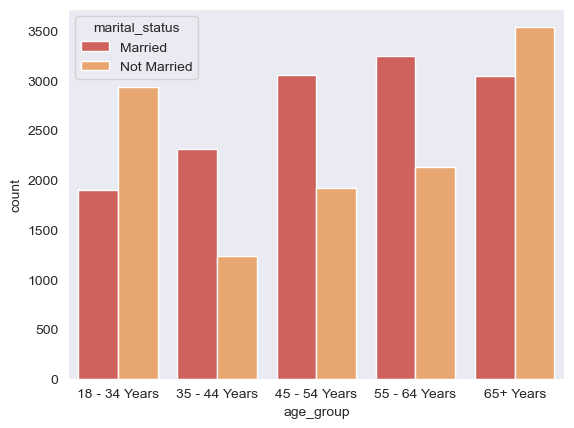

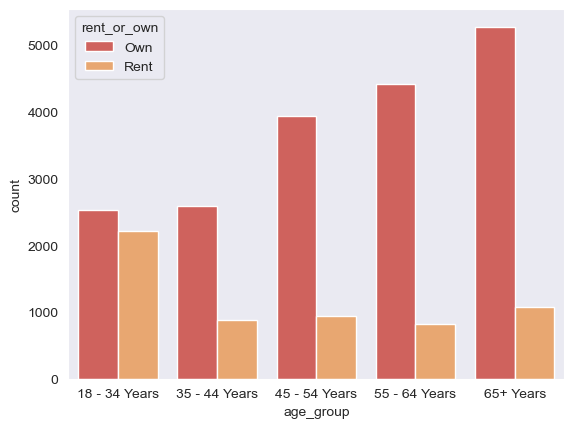

In [19]:
sns.countplot(x="age_group", hue="marital_status", data=df)
plt.show()
sns.countplot(x="age_group", hue="rent_or_own", data=df)


In [20]:
df_before_imputation = df.copy()

In [21]:
# Impute missing 'marital_status' values based on the mode within each 'age_group' group
df['marital_status'] = df.groupby('age_group')['marital_status'].transform(lambda x: x.fillna(x.mode().iloc[0]))

# Impute missing 'rent_or_own' values based on the mode within each 'age_group' group
df['rent_or_own'] = df.groupby('age_group')['rent_or_own'].transform(lambda x: x.fillna(x.mode().iloc[0]))


In [22]:
# from scipy.stats import mode

# def mode_agg(x):
#     return mode(x)[0]
# df.groupby('age_group')['marital_status'].agg(mode_agg)

In [23]:
df[["marital_status","rent_or_own"]].isnull().sum()

marital_status    0
rent_or_own       0
dtype: int64

In [24]:
def plot_feature_distribution(df_before, df_after, feature):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.countplot(x=feature, data=df_before, ax=axes[0])
    axes[0].set_title(f'Distribution of {feature} (Before Imputation)')

    sns.countplot(x=feature, data=df_after, ax=axes[1])
    axes[1].set_title(f'Distribution of {feature} (After Imputation)')

    plt.show()

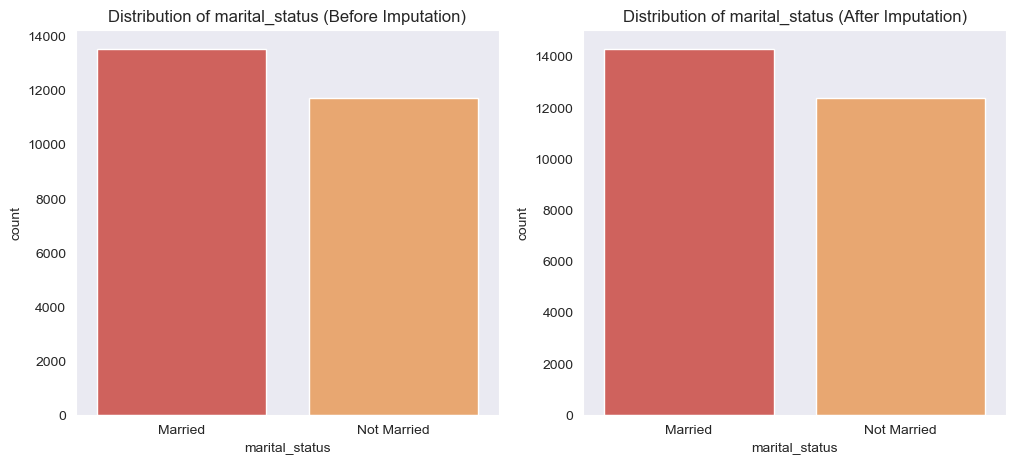

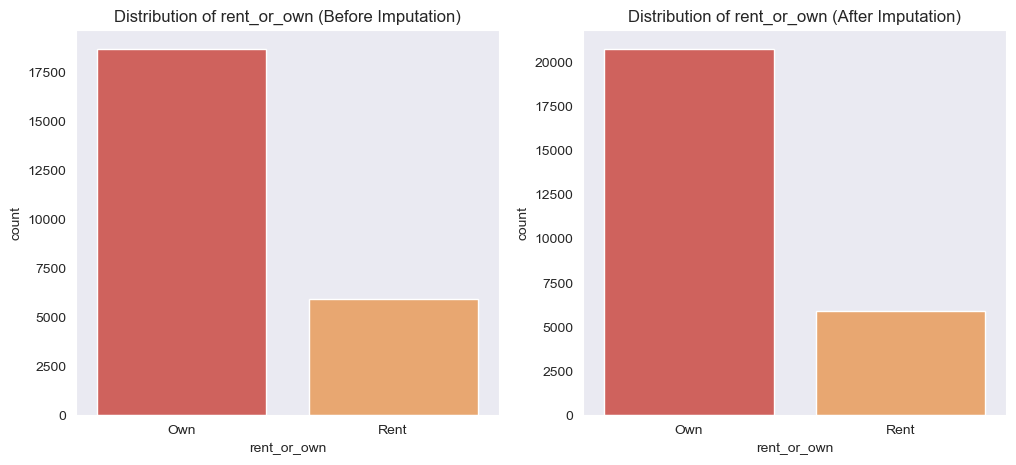

In [25]:
plot_feature_distribution(df_before_imputation, df, 'marital_status')
plot_feature_distribution(df_before_imputation, df, 'rent_or_own')

In [26]:
df[['marital_status', 'rent_or_own']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   marital_status  26707 non-null  category
 1   rent_or_own     26707 non-null  category
dtypes: category(2)
memory usage: 1.3 MB


---
- Visualized the distribution of 'marital_status' and 'rent_or_own' within each 'age_group' using seaborn's countplot() function.
- Created a copy of the original DataFrame before imputation to compare the distributions of 'marital_status' and 'rent_or_own' before and after imputation.
- Imputed missing values for 'marital_status' and 'rent_or_own' based on the mode within each 'age_group' using the groupby() and transform() functions with a lambda function.
- Compared the distribution of 'marital_status' and 'rent_or_own' features before and after imputation using the plot_feature_distribution() function, the distributions are similar before and after imputation, which indicates that the chosen imputation method has maintained the overall structure of the data without introducing significant bias or distortion.

#### 1.4.3.3 Vaccination Rates for H1N1 and Seasonal Vaccines vs. Public Opinions

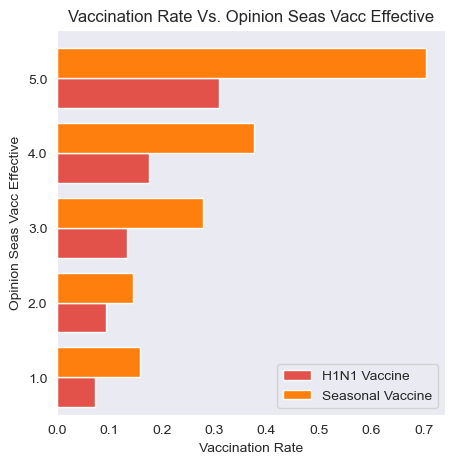

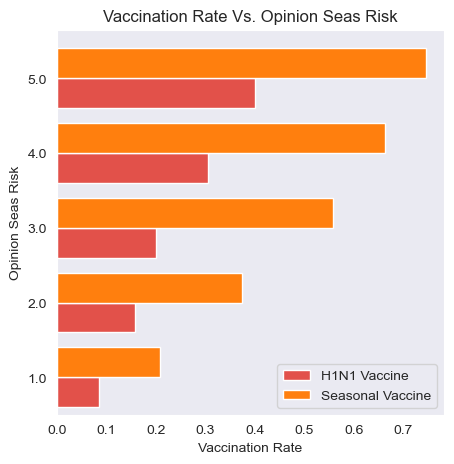

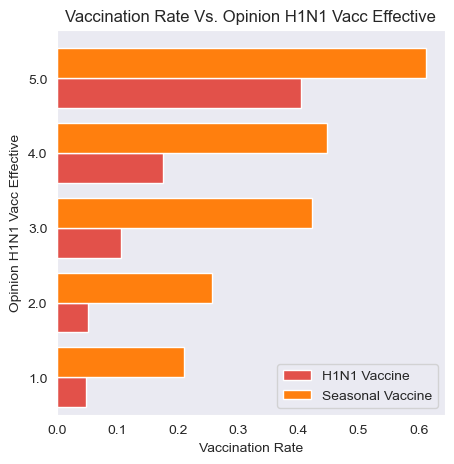

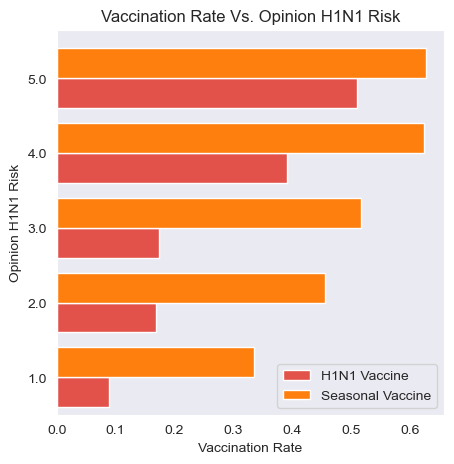

In [27]:
# Plot the vaccination rate vs. each of the features
for col in ['opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk']:
    df_plot = df[[col, 'h1n1_vaccine', 'seasonal_vaccine']].groupby(col).mean()
    fig = plt.figure(figsize=(5,5), )
    ax = fig.subplots(1)
    df_plot['h1n1_vaccine'].plot.barh( ax=ax, position=1, width=0.4, label='H1N1 Vaccine')
    df_plot['seasonal_vaccine'].plot.barh( ax=ax, position=0, width=0.4, color='tab:orange', label='Seasonal Vaccine')
    ax.set_ylim(-0.5, ax.get_ylim()[-1])
    col_nice = col.title().replace('_', ' ')
    ax.set_ylabel(col_nice)
    ax.set_xlabel('Vaccination Rate')
    ax.set_title('Vaccination Rate Vs. ' + col_nice)
    ax.legend()
    plt.show()


##### 1.4.3.3.1 Vaccination Rates for H1N1 vaccine vs. Public Opinions

In [28]:
from scipy.stats import chi2_contingency

# create a contingency table of h1n1_vaccine and opinion_h1n1_sick_from_vacc
table1 = pd.crosstab(df.h1n1_vaccine, df.opinion_h1n1_sick_from_vacc)

# perform the chi-squared test
chi1, p1, dof1, ex1 = chi2_contingency(table1)

# create a contingency table of h1n1_vaccine and opinion_h1n1_vacc_effective
table2 = pd.crosstab(df.h1n1_vaccine, df.opinion_h1n1_vacc_effective)

# perform the chi-squared test
chi2, p2, dof2, ex2 = chi2_contingency(table2)

# print the results
print("Chi-squared test of independence between h1n1_vaccine and opinion_h1n1_sick_from_vacc:")
print("Chi-squared statistic:", chi1)
print("p-value:", p1)

print("\nChi-squared test of independence between h1n1_vaccine and opinion_h1n1_vacc_effective:")
print("Chi-squared statistic:", chi2)
print("p-value:", p2)


Chi-squared test of independence between h1n1_vaccine and opinion_h1n1_sick_from_vacc:
Chi-squared statistic: 256.66184503324126
p-value: 2.3894110560251807e-54

Chi-squared test of independence between h1n1_vaccine and opinion_h1n1_vacc_effective:
Chi-squared statistic: 2428.7011454545773
p-value: 0.0


In [29]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pd.crosstab(index=df['opinion_h1n1_sick_from_vacc'],
                                                      columns=[df['opinion_h1n1_vacc_effective'],
                                                               df['opinion_h1n1_risk'],
                                                               df['h1n1_concern'],
                                                               df['h1n1_knowledge'],
                                                               df['h1n1_vaccine']]))
print("Chi-squared Statistic:", chi2)
print("p-value:", p)


Chi-squared Statistic: 13204.837225822936
p-value: 0.0


In [30]:
# import SimpleImputer class from sklearn.impute module
from sklearn.impute import SimpleImputer

# create an instance of SimpleImputer with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# fill in missing values for the columns with missing values
columns_with_missing_values = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_sick_from_vacc']
df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])

# Check for missing values
print("\nMissing values count:")
print(df[columns_with_missing_values].isna().sum())

# Verify the changes
print("\nDataFrame info:")
df[['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_sick_from_vacc', 'h1n1_vaccine']].info()



Missing values count:
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
h1n1_concern                   0
h1n1_knowledge                 0
opinion_h1n1_sick_from_vacc    0
dtype: int64

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   opinion_h1n1_vacc_effective  26707 non-null  float64
 1   opinion_h1n1_risk            26707 non-null  float64
 2   h1n1_concern                 26707 non-null  float64
 3   h1n1_knowledge               26707 non-null  float64
 4   opinion_h1n1_sick_from_vacc  26707 non-null  float64
 5   h1n1_vaccine                 26707 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 2.3 MB


---
- Plotted the vaccination rates for the H1N1 vaccine against public opinions (opinion_h1n1_vacc_effective, opinion_h1n1_risk) using horizontal bar charts.
- Observed that higher perceived effectiveness and risk were associated with higher vaccination rates, suggesting a strong influence of public opinion on the decision to get the H1N1 vaccine.
- This finding emphasizes the importance of effective public health communication and education to encourage vaccination uptake.

##### 1.4.3.3.2 Vaccination Rates for Seasonal Vaccine vs. Public Opinions

In [31]:
from scipy.stats import chi2_contingency

# Create a contingency table of seasonal_vaccine and opinion_seas_sick_from_vacc
table1 = pd.crosstab(df.seasonal_vaccine, df.opinion_seas_sick_from_vacc)

# Perform the chi-squared test
chi1, p1, dof1, ex1 = chi2_contingency(table1)

# Create a contingency table of seasonal_vaccine and opinion_seas_vacc_effective
table2 = pd.crosstab(df.seasonal_vaccine, df.opinion_seas_vacc_effective)

# Perform the chi-squared test
chi2, p2, dof2, ex2 = chi2_contingency(table2)

# Print the results
print("Chi-squared test of independence between seasonal_vaccine and opinion_seas_sick_from_vacc:")
print("Chi-squared statistic:", chi1)
print("p-value:", p1)

print("\nChi-squared test of independence between seasonal_vaccine and opinion_seas_vacc_effective:")
print("Chi-squared statistic:", chi2)
print("p-value:", p2)

# Perform a chi-squared test of independence between opinion_seas_sick_from_vacc and multiple other opinion and knowledge-related columns
chi2, p, dof, expected = chi2_contingency(pd.crosstab(index=df['opinion_seas_sick_from_vacc'],
                                                      columns=[df['opinion_seas_vacc_effective'],
                                                               df['opinion_seas_risk'],
                                                               df['h1n1_concern'],
                                                               df['h1n1_knowledge'],
                                                               df['seasonal_vaccine']]))
print("\nChi-squared Statistic:", chi2)
print("p-value:", p)



Chi-squared test of independence between seasonal_vaccine and opinion_seas_sick_from_vacc:
Chi-squared statistic: 233.9793061475755
p-value: 1.8360442950034836e-49

Chi-squared test of independence between seasonal_vaccine and opinion_seas_vacc_effective:
Chi-squared statistic: 4203.836920973084
p-value: 0.0

Chi-squared Statistic: 11154.673995177727
p-value: 0.0


In [32]:
# Fill in missing values for the columns with missing values
columns_with_missing_values = ['opinion_seas_vacc_effective', 'opinion_seas_risk', 'h1n1_concern', 'h1n1_knowledge', 'opinion_seas_sick_from_vacc']
df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])

# Check for missing values
print("\nMissing values count:")
df[columns_with_missing_values].isna().sum()


Missing values count:


opinion_seas_vacc_effective    0
opinion_seas_risk              0
h1n1_concern                   0
h1n1_knowledge                 0
opinion_seas_sick_from_vacc    0
dtype: int64

In [33]:
# Verify the changes
print("\nDataFrame info:")
df[['opinion_seas_vacc_effective', 'opinion_seas_risk', 'h1n1_concern', 'h1n1_knowledge', 'opinion_seas_sick_from_vacc', 'seasonal_vaccine']].info()



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   opinion_seas_vacc_effective  26707 non-null  float64
 1   opinion_seas_risk            26707 non-null  float64
 2   h1n1_concern                 26707 non-null  float64
 3   h1n1_knowledge               26707 non-null  float64
 4   opinion_seas_sick_from_vacc  26707 non-null  float64
 5   seasonal_vaccine             26707 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 2.3 MB


---
- Plotted the vaccination rates for the seasonal vaccine against public opinions (opinion_seas_vacc_effective, opinion_seas_risk) using horizontal bar charts.
- Similar to the H1N1 vaccine, we observed that higher perceived effectiveness and risk were associated with higher vaccination rates for the seasonal vaccine.
- This highlights the role of public opinion in shaping vaccination behavior and the need for targeted public health campaigns to address misconceptions and promote the benefits of vaccination.

In [34]:
def data_info(df):
    info = pd.DataFrame(index=df.columns)
    info['DataType'] = df.dtypes
    info['Unique_Values'] = df.nunique()
    info['Missing Values'] = df.isnull().sum()
    info['Missing Values Percentage (%)'] = (info['Missing Values'] / df.shape[0]) * 100
    return info
data_info(df)

DataType  Unique_Values  Missing Values  \
h1n1_concern                  float64              4               0   
h1n1_knowledge                float64              3               0   
behavioral_antiviral_meds        bool              2               0   
behavioral_avoidance             bool              2               0   
behavioral_face_mask             bool              2               0   
behavioral_wash_hands            bool              2               0   
behavioral_large_gatherings      bool              2               0   
behavioral_outside_home          bool              2               0   
behavioral_touch_face            bool              2               0   
doctor_recc_h1n1                 bool              2               0   
doctor_recc_seasonal             bool              2               0   
chronic_med_condition            bool              2               0   
child_under_6_months             bool              2               0   
health_worker                    bool              2               0   
opinion_h1n1_vacc_effective   float64              5               0   
opinion_h1n1_risk             float64              5               0   
opinion_h1n1_sick_from_vacc   float64              5               0   
opinion_seas_vacc_effective   float64              5               0   
opinion_seas_risk             float64              5               0   
opinion_seas_sick_from_vacc   float64              5               0   
age_group                    category              5               0   
education                      object              4               0   
race                         category              4               0   
sex                          category              2               0   
income_poverty               category              3            4423   
marital_status               category              2               0   
rent_or_own                  category              2               0   
employment_status              object              3               0   
hhs_geo_region               category             10               0   
census_msa                   category              3               0   
household_adults             category              4             249   
household_children           category              4             249   
h1n1_vaccine                     bool              2               0   
seasonal_vaccine                 bool              2               0   

                             Missing Values Percentage (%)  
h1n1_concern                                      0.000000  
h1n1_knowledge                                    0.000000  
behavioral_antiviral_meds                         0.000000  
behavioral_avoidance                              0.000000  
behavioral_face_mask                              0.000000  
behavioral_wash_hands                             0.000000  
behavioral_large_gatherings                       0.000000  
behavioral_outside_home                           0.000000  
behavioral_touch_face                             0.000000  
doctor_recc_h1n1                                  0.000000  
doctor_recc_seasonal                              0.000000  
chronic_med_condition                             0.000000  
child_under_6_months                              0.000000  
health_worker                                     0.000000  
opinion_h1n1_vacc_effective                       0.000000  
opinion_h1n1_risk                                 0.000000  
opinion_h1n1_sick_from_vacc                       0.000000  
opinion_seas_vacc_effective                       0.000000  
opinion_seas_risk                                 0.000000  
opinion_seas_sick_from_vacc                       0.000000  
age_group                                         0.000000  
education                                         0.000000  
race                                              0.000000  
sex                                         

#### 1.4.3.4 income_poverty vs employment_status

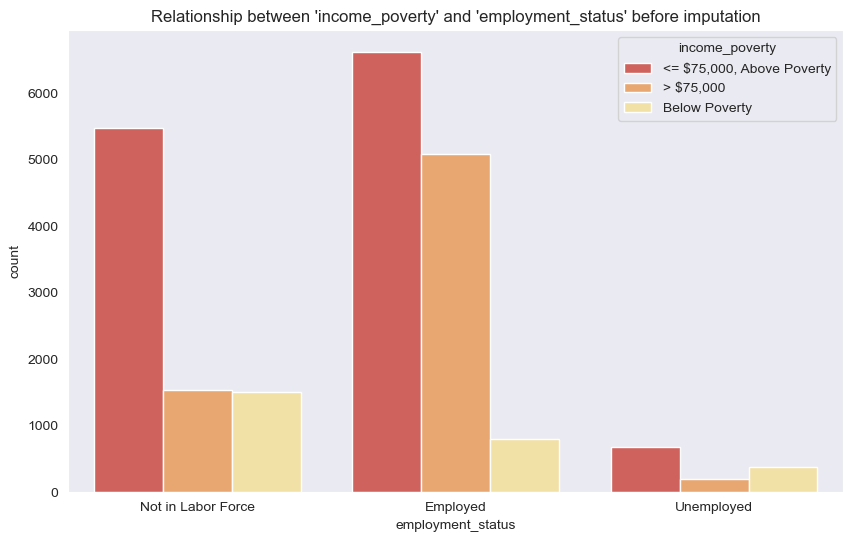

In [35]:
# Visualize the relationship between 'income_poverty' and 'employment_status'
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_status', hue='income_poverty', data=df_before_imputation)
plt.title("Relationship between 'income_poverty' and 'employment_status' before imputation")
plt.show()

In [36]:
# Create a copy of the DataFrame before imputation
df_before_imputation = df.copy()

In [37]:

# Impute missing 'income_poverty' values based on the mode within each 'employment_status' group
df['income_poverty'] = df.groupby('employment_status')['income_poverty'].transform(lambda x: x.fillna(x.mode().iloc[0]))

# the contingency table before and after imputation
table_before_imputation = pd.crosstab(df_before_imputation.income_poverty, df_before_imputation.employment_status)
table_after_imputation = pd.crosstab(df.income_poverty, df.employment_status)

# chi-squared test
chi_before, p_before, dof_before, ex_before = chi2_contingency(table_before_imputation)
chi_after, p_after, dof_after, ex_after = chi2_contingency(table_after_imputation)

# the results before and after imputation
print("Chi-squared test of independence between income_poverty and employment_status before imputation:")
print("Chi-squared statistic:", chi_before)
print("p-value:", p_before)

print("\nChi-squared test of independence between income_poverty and employment_status after imputation:")
print("Chi-squared statistic:", chi_after)
print("p-value:", p_after)


Chi-squared test of independence between income_poverty and employment_status before imputation:
Chi-squared statistic: 1984.441437691982
p-value: 0.0

Chi-squared test of independence between income_poverty and employment_status after imputation:
Chi-squared statistic: 1974.0449118808012
p-value: 0.0


---
- Visualized the relationship between 'income_poverty' and 'employment_status' using seaborn's countplot() function before imputation, which showed a clear association between these two variables.
- Created a copy of the DataFrame before imputation for comparison purposes.
- Imputed missing values for 'income_poverty' based on the mode within each 'employment_status' group using the groupby() and transform() functions with a lambda function. This approach aimed to preserve the relationship between 'income_poverty' and 'employment_status'.
- Calculated the contingency table for 'income_poverty' and 'employment_status' before and after imputation and performed the chi-squared test of independence for both tables.
- Observed that the chi-squared statistic and p-value were almost unchanged after imputation, which indicates that the chosen imputation method maintained the overall structure of the data and preserved the relationship between 'income_poverty' and 'employment_status' without introducing significant bias or distortion.

In [38]:
def data_info(df):
    info = pd.DataFrame(index=df.columns)
    info['DataType'] = df.dtypes
    info['Unique_Values'] = df.nunique()
    info['Missing Values'] = df.isnull().sum()
    info['Missing Values Percentage (%)'] = (info['Missing Values'] / df.shape[0]) * 100
    return info
data_info(df)

DataType  Unique_Values  Missing Values  \
h1n1_concern                  float64              4               0   
h1n1_knowledge                float64              3               0   
behavioral_antiviral_meds        bool              2               0   
behavioral_avoidance             bool              2               0   
behavioral_face_mask             bool              2               0   
behavioral_wash_hands            bool              2               0   
behavioral_large_gatherings      bool              2               0   
behavioral_outside_home          bool              2               0   
behavioral_touch_face            bool              2               0   
doctor_recc_h1n1                 bool              2               0   
doctor_recc_seasonal             bool              2               0   
chronic_med_condition            bool              2               0   
child_under_6_months             bool              2               0   
health_worker                    bool              2               0   
opinion_h1n1_vacc_effective   float64              5               0   
opinion_h1n1_risk             float64              5               0   
opinion_h1n1_sick_from_vacc   float64              5               0   
opinion_seas_vacc_effective   float64              5               0   
opinion_seas_risk             float64              5               0   
opinion_seas_sick_from_vacc   float64              5               0   
age_group                    category              5               0   
education                      object              4               0   
race                         category              4               0   
sex                          category              2               0   
income_poverty               category              3               0   
marital_status               category              2               0   
rent_or_own                  category              2               0   
employment_status              object              3               0   
hhs_geo_region               category             10               0   
census_msa                   category              3               0   
household_adults             category              4             249   
household_children           category              4             249   
h1n1_vaccine                     bool              2               0   
seasonal_vaccine                 bool              2               0   

                             Missing Values Percentage (%)  
h1n1_concern                                       0.00000  
h1n1_knowledge                                     0.00000  
behavioral_antiviral_meds                          0.00000  
behavioral_avoidance                               0.00000  
behavioral_face_mask                               0.00000  
behavioral_wash_hands                              0.00000  
behavioral_large_gatherings                        0.00000  
behavioral_outside_home                            0.00000  
behavioral_touch_face                              0.00000  
doctor_recc_h1n1                                   0.00000  
doctor_recc_seasonal                               0.00000  
chronic_med_condition                              0.00000  
child_under_6_months                               0.00000  
health_worker                                      0.00000  
opinion_h1n1_vacc_effective                        0.00000  
opinion_h1n1_risk                                  0.00000  
opinion_h1n1_sick_from_vacc                        0.00000  
opinion_seas_vacc_effective                        0.00000  
opinion_seas_risk                                  0.00000  
opinion_seas_sick_from_vacc                        0.00000  
age_group                                          0.00000  
education                                          0.00000  
race                                               0.00000  
sex                                         

#### 1.4.3.5 household_children vs household_adults

C:\Users\r-a-a\anaconda3\envs\cw1\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


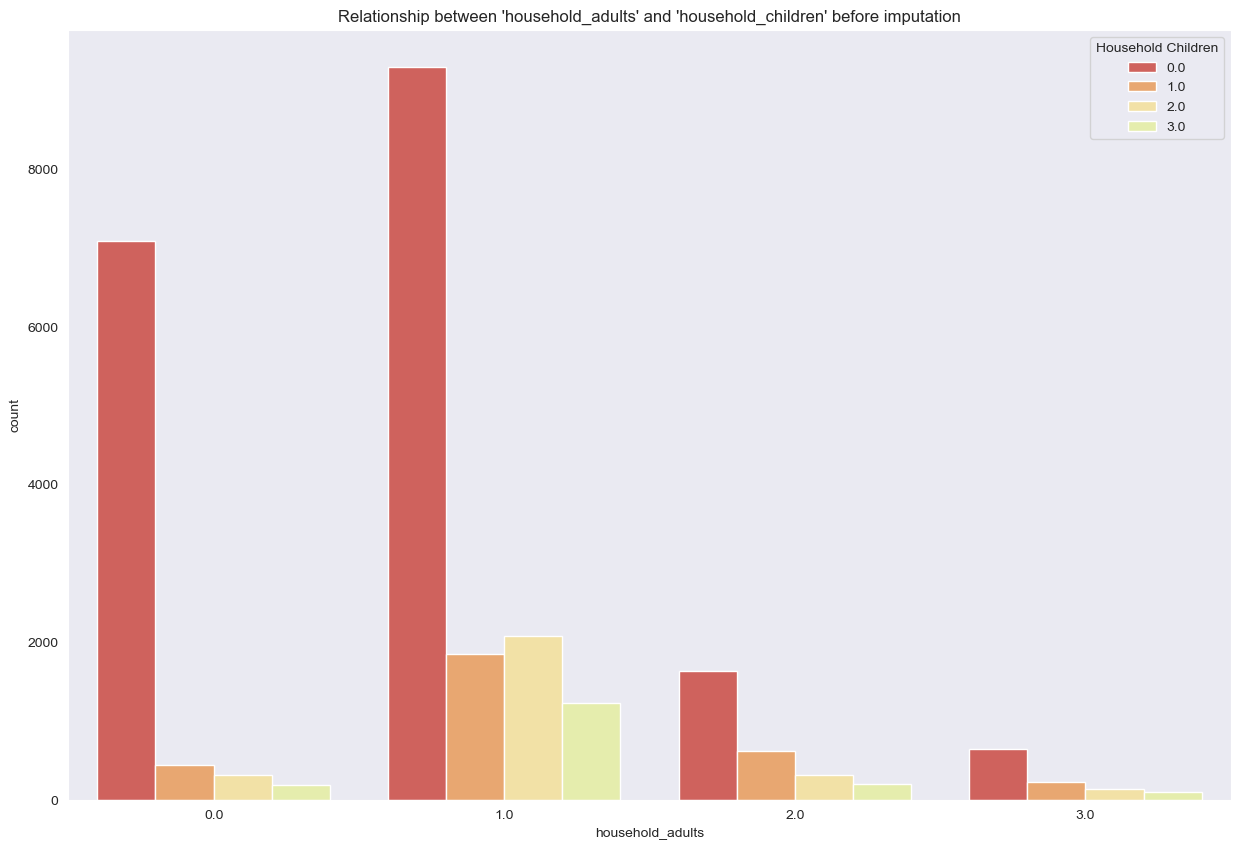

In [39]:
plt.figure(figsize=(15, 10))
sns.countplot(x='household_adults', hue='household_children', data=df_before_imputation)
plt.title("Relationship between 'household_adults' and 'household_children' before imputation")
plt.legend(title='Household Children', loc='upper right')
plt.show()


In [40]:
# Impute missing 'household_adults' and 'household_children' values based on the mode within each 'income_poverty' group
df['household_adults'] = df.groupby('income_poverty')['household_adults'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df['household_children'] = df.groupby('income_poverty')['household_children'].transform(lambda x: x.fillna(x.mode().iloc[0]))
# the contingency table before and after imputation
table_before_imputation = pd.crosstab(df_before_imputation.household_adults, df_before_imputation.household_children)
table_after_imputation = pd.crosstab(df.household_adults, df.household_children)

# chi-squared test
chi_before, p_before, dof_before, ex_before = chi2_contingency(table_before_imputation)
chi_after, p_after, dof_after, ex_after = chi2_contingency(table_after_imputation)

# the results before and after imputation
print("Chi-squared test of independence between household_adults and household_children before imputation:")
print("Chi-squared statistic:", chi_before)
print("p-value:", p_before)

print("\nChi-squared test of independence between household_adults and household_children after imputation:")
print("Chi-squared statistic:", chi_after)
print("p-value:", p_after)

Chi-squared test of independence between household_adults and household_children before imputation:
Chi-squared statistic: 1971.1507299797927
p-value: 0.0

Chi-squared test of independence between household_adults and household_children after imputation:
Chi-squared statistic: 1935.0977562289631
p-value: 0.0


---
- Visualized the relationship between 'household_adults' and 'household_children' using seaborn's countplot() function before imputation, which showed some patterns in the data, but no clear association between these two variables.
- Created a copy of the DataFrame before imputation for comparison purposes.
- Imputed missing values for 'household_adults' and 'household_children' based on the mode within each 'income_poverty' group using the groupby() and transform() functions with a lambda function. This approach aimed to preserve any potential relationship between 'household_adults', 'household_children', and 'income_poverty'.
- Calculated the contingency table for 'household_adults' and 'household_children' before and after imputation and performed the chi-squared test of independence for both tables.
- Observed that the chi-squared statistic and p-value changed after imputation, indicating that the imputation method may have affected the relationship between 'household_adults' and 'household_children'. Further analysis is needed to determine if this change is significant or if an alternative imputation method should be considered.

In [41]:
def data_info(df):
    info = pd.DataFrame(index=df.columns)
    info['DataType'] = df.dtypes
    info['Unique_Values'] = df.nunique()
    info['Missing Values'] = df.isnull().sum()
    info['Missing Values Percentage (%)'] = (info['Missing Values'] / df.shape[0]) * 100
    return info
data_info(df)

DataType  Unique_Values  Missing Values  \
h1n1_concern                  float64              4               0   
h1n1_knowledge                float64              3               0   
behavioral_antiviral_meds        bool              2               0   
behavioral_avoidance             bool              2               0   
behavioral_face_mask             bool              2               0   
behavioral_wash_hands            bool              2               0   
behavioral_large_gatherings      bool              2               0   
behavioral_outside_home          bool              2               0   
behavioral_touch_face            bool              2               0   
doctor_recc_h1n1                 bool              2               0   
doctor_recc_seasonal             bool              2               0   
chronic_med_condition            bool              2               0   
child_under_6_months             bool              2               0   
health_worker                    bool              2               0   
opinion_h1n1_vacc_effective   float64              5               0   
opinion_h1n1_risk             float64              5               0   
opinion_h1n1_sick_from_vacc   float64              5               0   
opinion_seas_vacc_effective   float64              5               0   
opinion_seas_risk             float64              5               0   
opinion_seas_sick_from_vacc   float64              5               0   
age_group                    category              5               0   
education                      object              4               0   
race                         category              4               0   
sex                          category              2               0   
income_poverty               category              3               0   
marital_status               category              2               0   
rent_or_own                  category              2               0   
employment_status              object              3               0   
hhs_geo_region               category             10               0   
census_msa                   category              3               0   
household_adults             category              4               0   
household_children           category              4               0   
h1n1_vaccine                     bool              2               0   
seasonal_vaccine                 bool              2               0   

                             Missing Values Percentage (%)  
h1n1_concern                                           0.0  
h1n1_knowledge                                         0.0  
behavioral_antiviral_meds                              0.0  
behavioral_avoidance                                   0.0  
behavioral_face_mask                                   0.0  
behavioral_wash_hands                                  0.0  
behavioral_large_gatherings                            0.0  
behavioral_outside_home                                0.0  
behavioral_touch_face                                  0.0  
doctor_recc_h1n1                                       0.0  
doctor_recc_seasonal                                   0.0  
chronic_med_condition                                  0.0  
child_under_6_months                                   0.0  
health_worker                                          0.0  
opinion_h1n1_vacc_effective                            0.0  
opinion_h1n1_risk                                      0.0  
opinion_h1n1_sick_from_vacc                            0.0  
opinion_seas_vacc_effective                            0.0  
opinion_seas_risk                                      0.0  
opinion_seas_sick_from_vacc                            0.0  
age_group                                              0.0  
education                                              0.0  
race                                                   0.0  
sex                                         

## 1.5 Handling categorical features

In [42]:
categorical_cols = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# update categorical_cols to include only the new column names
new_cols = [col for col in df_encoded.columns if col not in df.columns]
categorical_cols_encoded = [col for col in new_cols if any(cat in col for cat in categorical_cols)]


In [43]:
df_encoded.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'h1n1_vaccine',
       'seasonal_vaccine', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_< 12 Years',
       'education_College Graduate', 'education_Some College', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'sex_Male',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'marital_status_Not Married', 'rent_or_own_Rent',
 

In [44]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 56 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   h1n1_concern                          26707 non-null  float64
 1   h1n1_knowledge                        26707 non-null  float64
 2   behavioral_antiviral_meds             26707 non-null  bool   
 3   behavioral_avoidance                  26707 non-null  bool   
 4   behavioral_face_mask                  26707 non-null  bool   
 5   behavioral_wash_hands                 26707 non-null  bool   
 6   behavioral_large_gatherings           26707 non-null  bool   
 7   behavioral_outside_home               26707 non-null  bool   
 8   behavioral_touch_face                 26707 non-null  bool   
 9   doctor_recc_h1n1                      26707 non-null  bool   
 10  doctor_recc_seasonal                  26707 non-null  bool   
 11  chronic_med_con

In [45]:
df_encoded.to_csv('flushot_modified_CLEAN.csv')


# 2. EDA

- Q4: Research question: How can we leverage the provided dataset features to predict an individual's likelihood of receiving the H1N1 and seasonal flu vaccines and identify key factors influencing vaccination decisions?
- Sub-question 1: "Which demographic, socioeconomic, and behavioural features are the strongest predictors of an individual's likelihood to receive the H1N1 and seasonal flu vaccines, and how do these predictors differ between the two vaccines?"
- Sub-question 2: "How do individuals' opinions about vaccine effectiveness, risk perception, and concerns about side effects influence their likelihood of receiving the H1N1 and seasonal flu vaccines, and how can this information be used to improve public health communication strategies?"


In [46]:
df.columns.str.contains("behavior")

array([False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

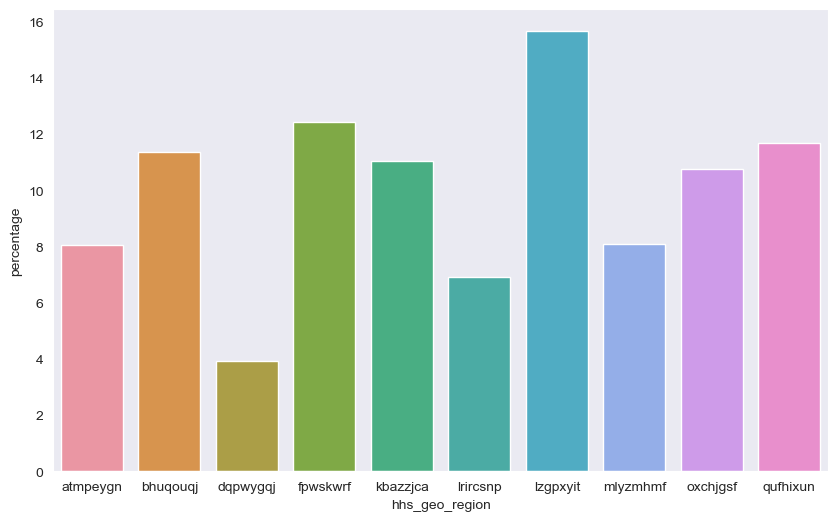

In [47]:
# Of those who received the seasonal vaccines which region did they belong to
region_vaccine_counts = df.groupby('hhs_geo_region')["seasonal_vaccine"].sum().reset_index()
total_vaccines= region_vaccine_counts["seasonal_vaccine"].sum()
region_vaccine_counts["percentage"]=(region_vaccine_counts["seasonal_vaccine"]/total_vaccines)*100

plt.figure(figsize=(10,6))
sns.barplot(x="hhs_geo_region",y="percentage",data=region_vaccine_counts)
plt.show()

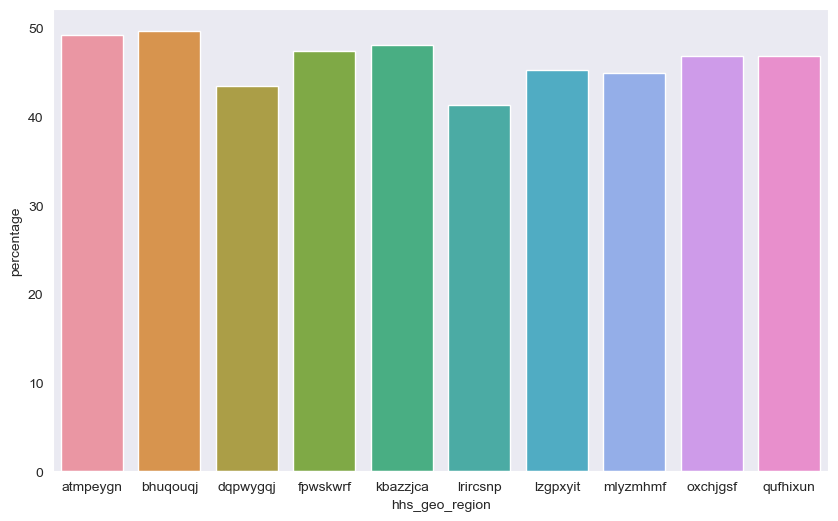

In [48]:
# How many people from every region received the seasonal vaccine
region_vaccine_count = df.groupby('hhs_geo_region')["seasonal_vaccine"].sum().reset_index()
count_for_region = df.groupby('hhs_geo_region')["seasonal_vaccine"].count().reset_index().rename(columns={"seasonal_vaccine":"population"})
# region_vaccine_counts["percentage"]=(region_vaccine_counts["seasonal_vaccine"]/total_vaccines)*
final = pd.merge(region_vaccine_count,count_for_region,on="hhs_geo_region",)
final["percentage"] = final["seasonal_vaccine"]/final["population"]*100

plt.figure(figsize=(10,6))
sns.barplot(x="hhs_geo_region",y="percentage",data=final)
plt.show()

In [49]:
df.describe(include="category").columns

Index(['age_group', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children'],
      dtype='object')

Univariate Analysis: Analyze the distribution of individual features.

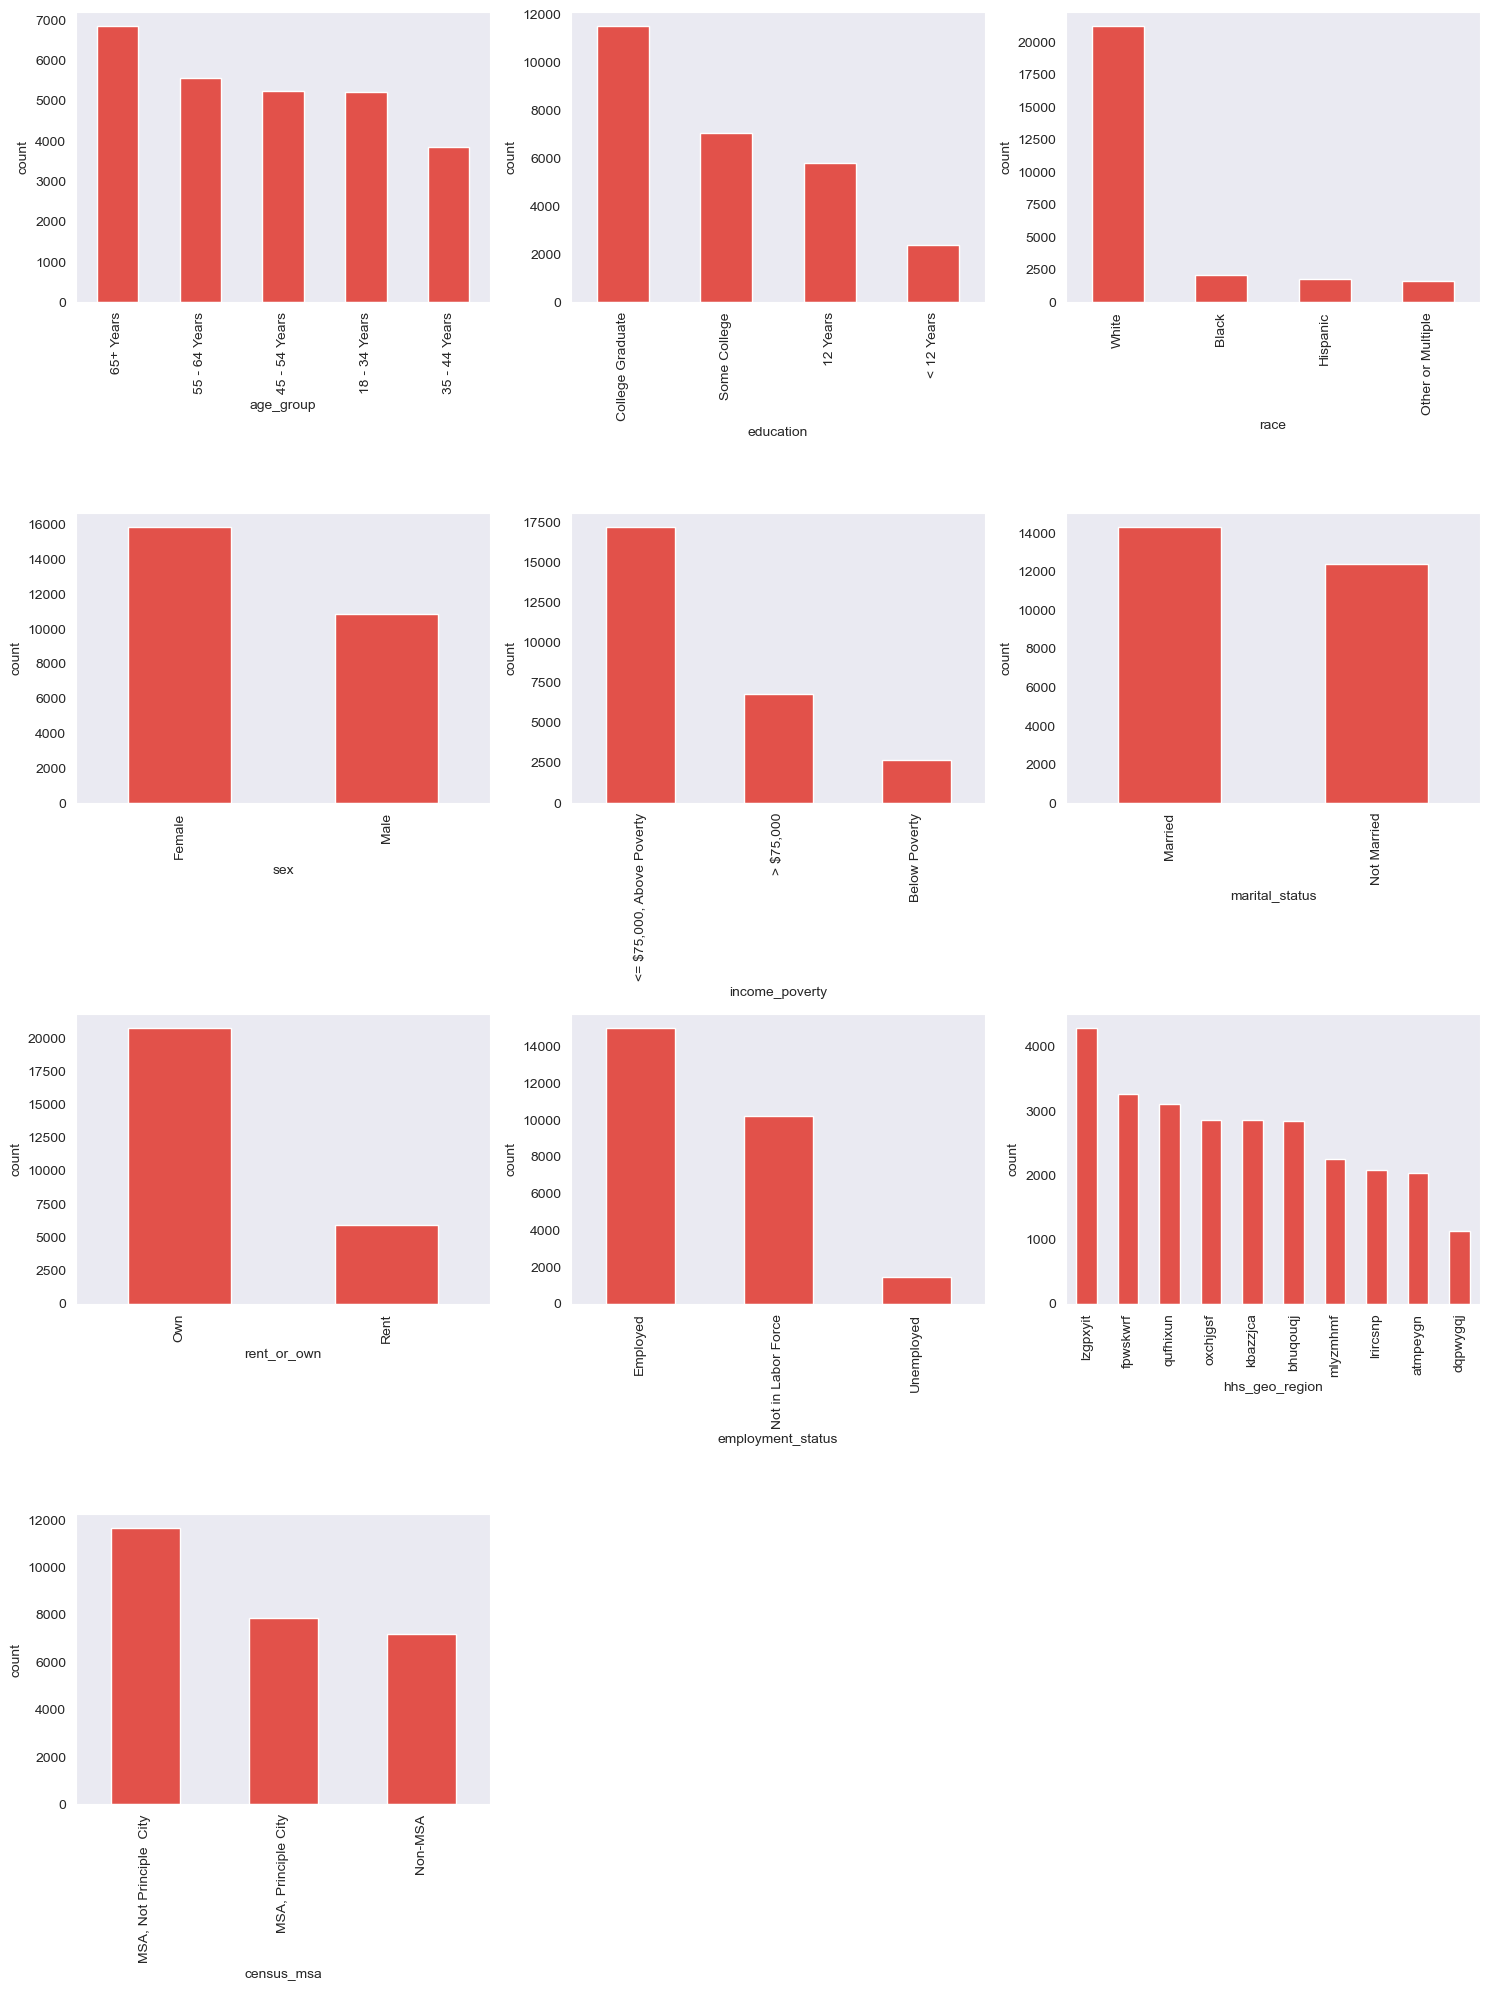

In [50]:
categorical_features = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa']

n_features =len(categorical_features)
n_cols =3
n_rows= (n_features +n_cols-1) //n_cols

fig,axes = plt.subplots(n_rows,n_cols,figsize=(15,n_rows*5))

for idx, feature in enumerate(categorical_features):
    row,col = idx//n_cols,idx%n_cols
    ax = axes[row,col]

#     sns.barplot(data=df,x=feature,y=feature.value_counts().values,ax=ax)
    df[feature].value_counts().plot.bar(ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("count")

for idx in range(n_features,n_rows*n_cols):
    row,col = idx//n_cols,idx%n_cols
    fig.delaxes(axes[row,col])
plt.tight_layout()
plt.show()

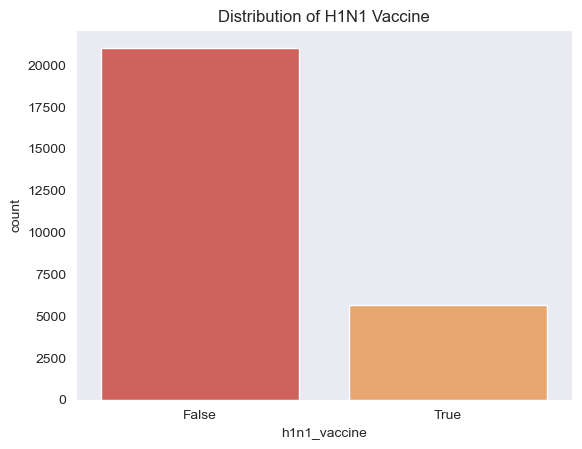

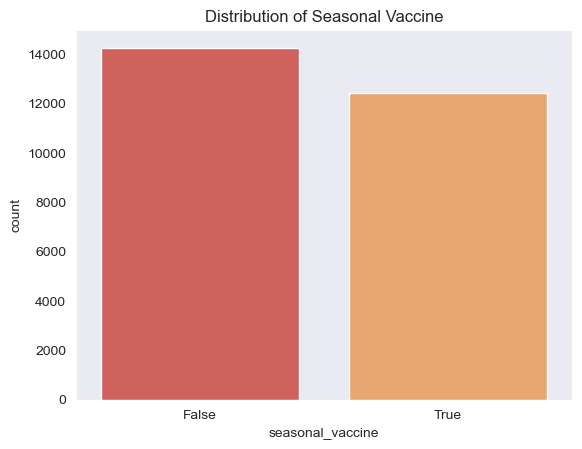

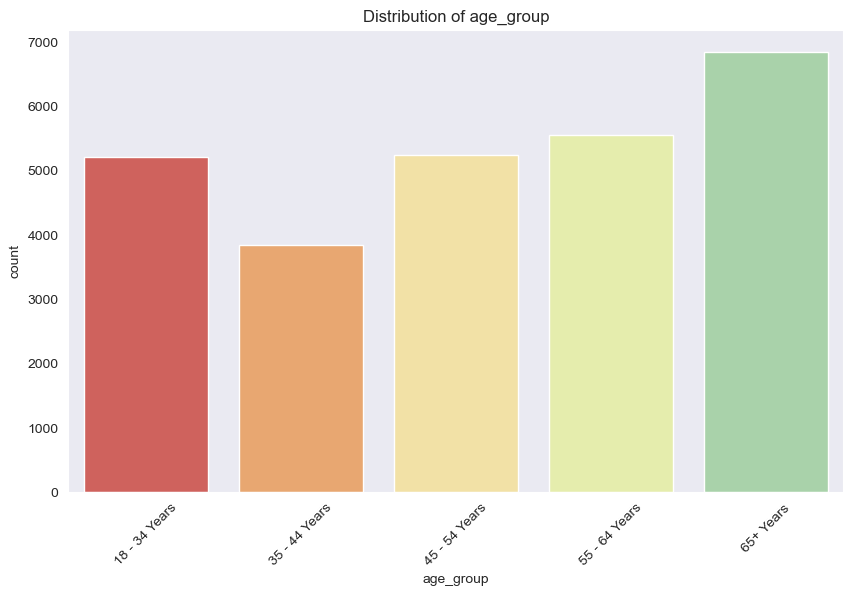

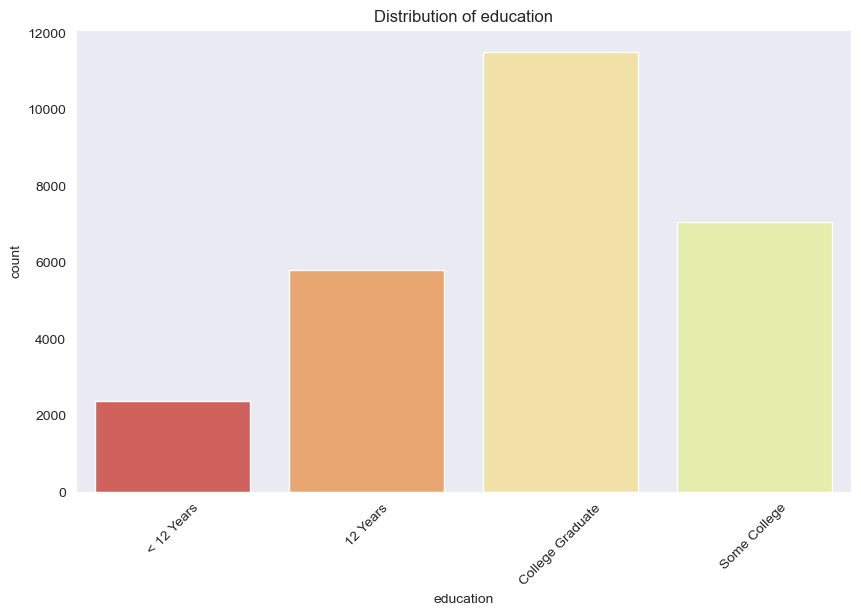

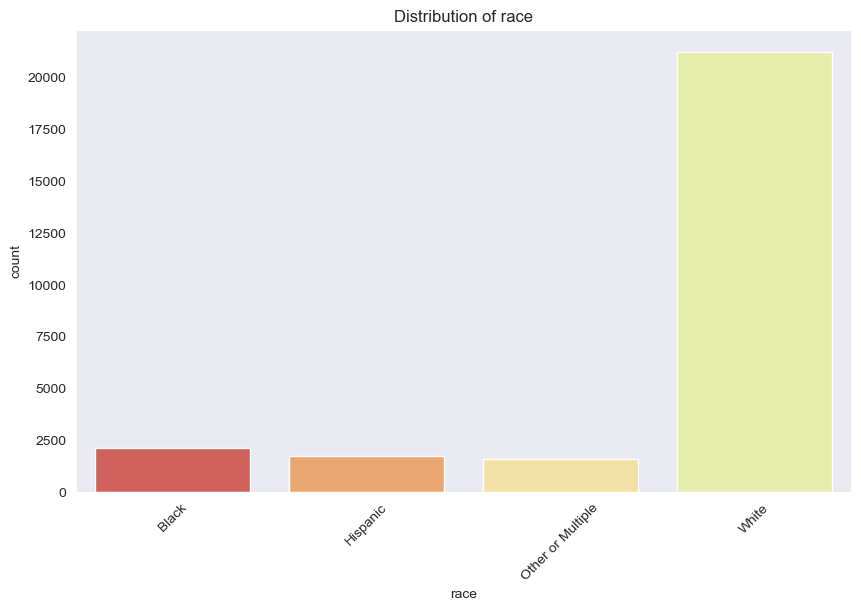

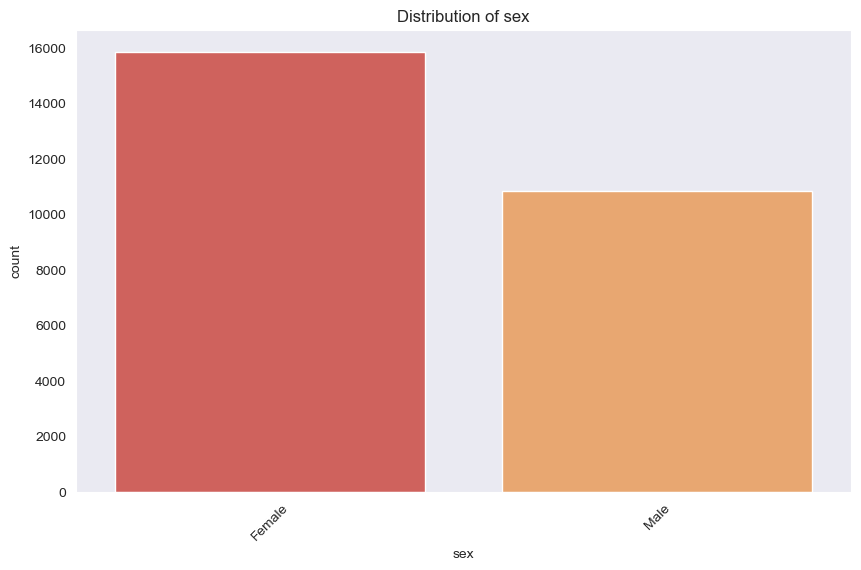

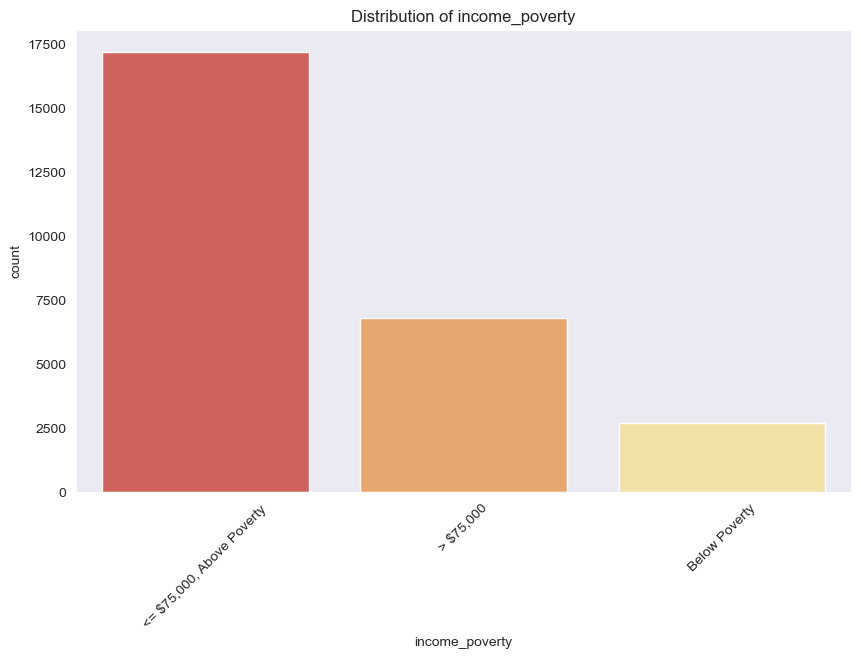

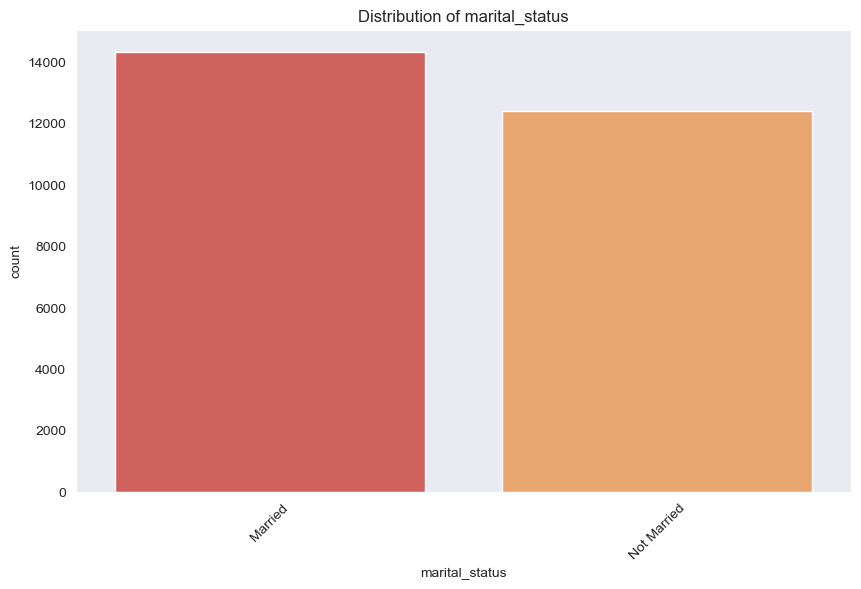

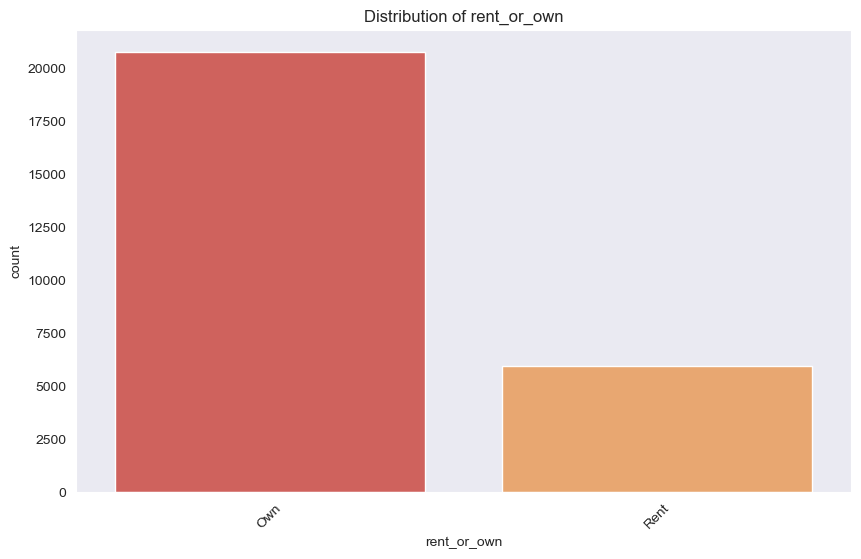

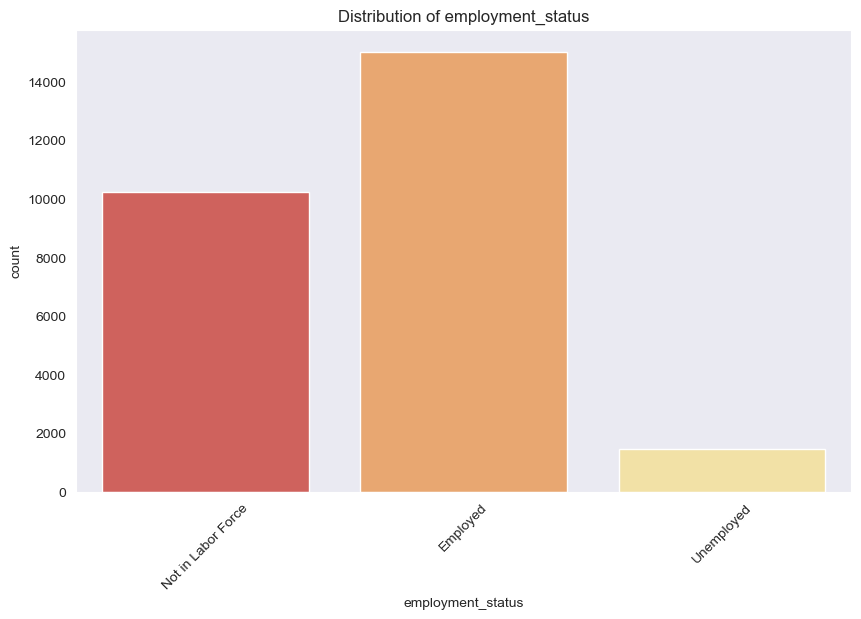

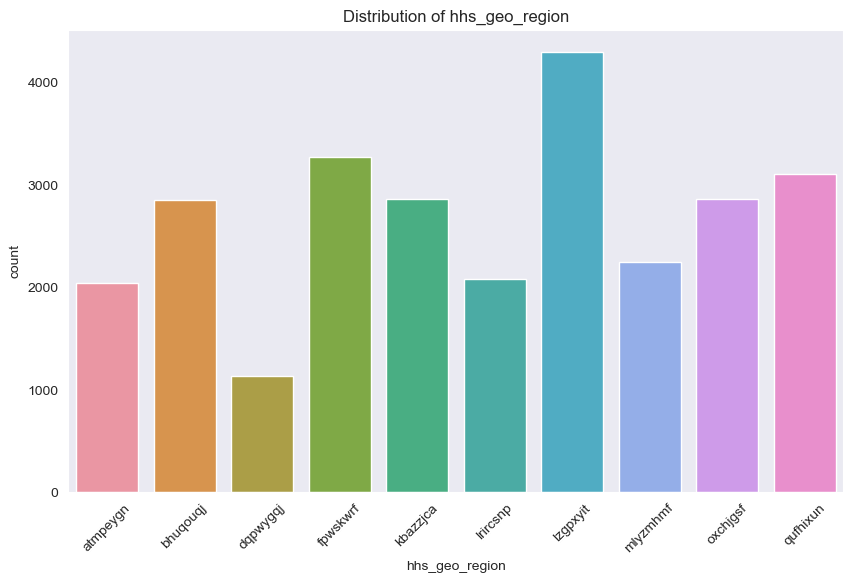

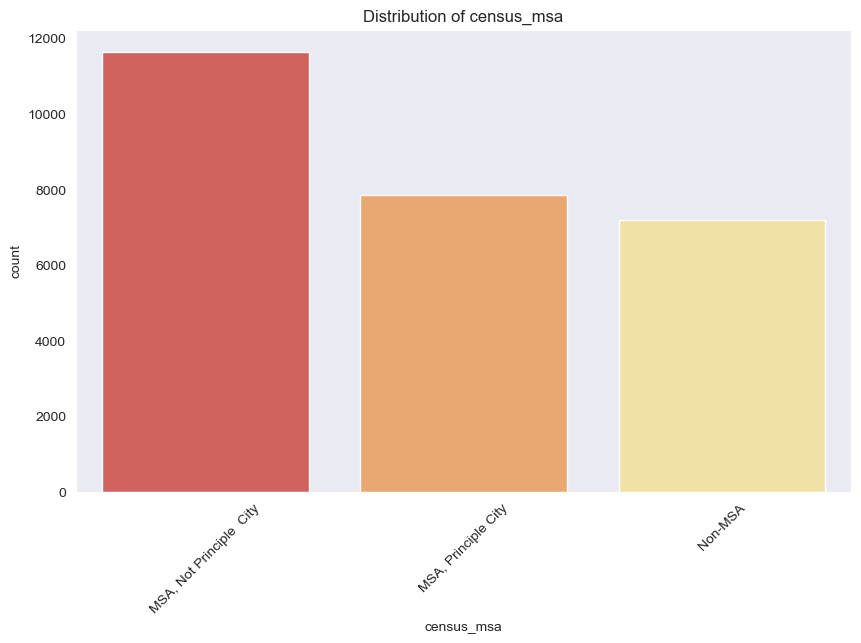

In [51]:
# Distribution of target variables
sns.countplot(x='h1n1_vaccine', data=df)
plt.title("Distribution of H1N1 Vaccine")
plt.show()

sns.countplot(x='seasonal_vaccine', data=df)
plt.title("Distribution of Seasonal Vaccine")
plt.show()

# Distribution of categorical features
categorical_features = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    plt.show()


Bivariate Analysis: Explore relationships between features and target variables.

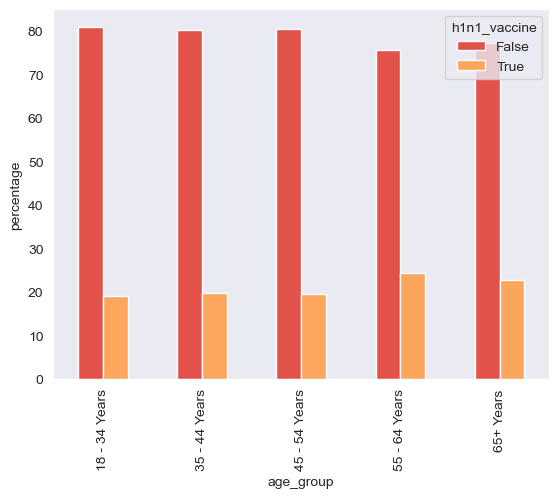

In [52]:
table_1 = pd.crosstab(df["age_group"],df["h1n1_vaccine"])
table_1 = table_1.div(table_1.sum(axis=1),axis=0)*100
table_1.plot.bar()
plt.ylabel("percentage")
plt.xlabel("age_group")
plt.show()

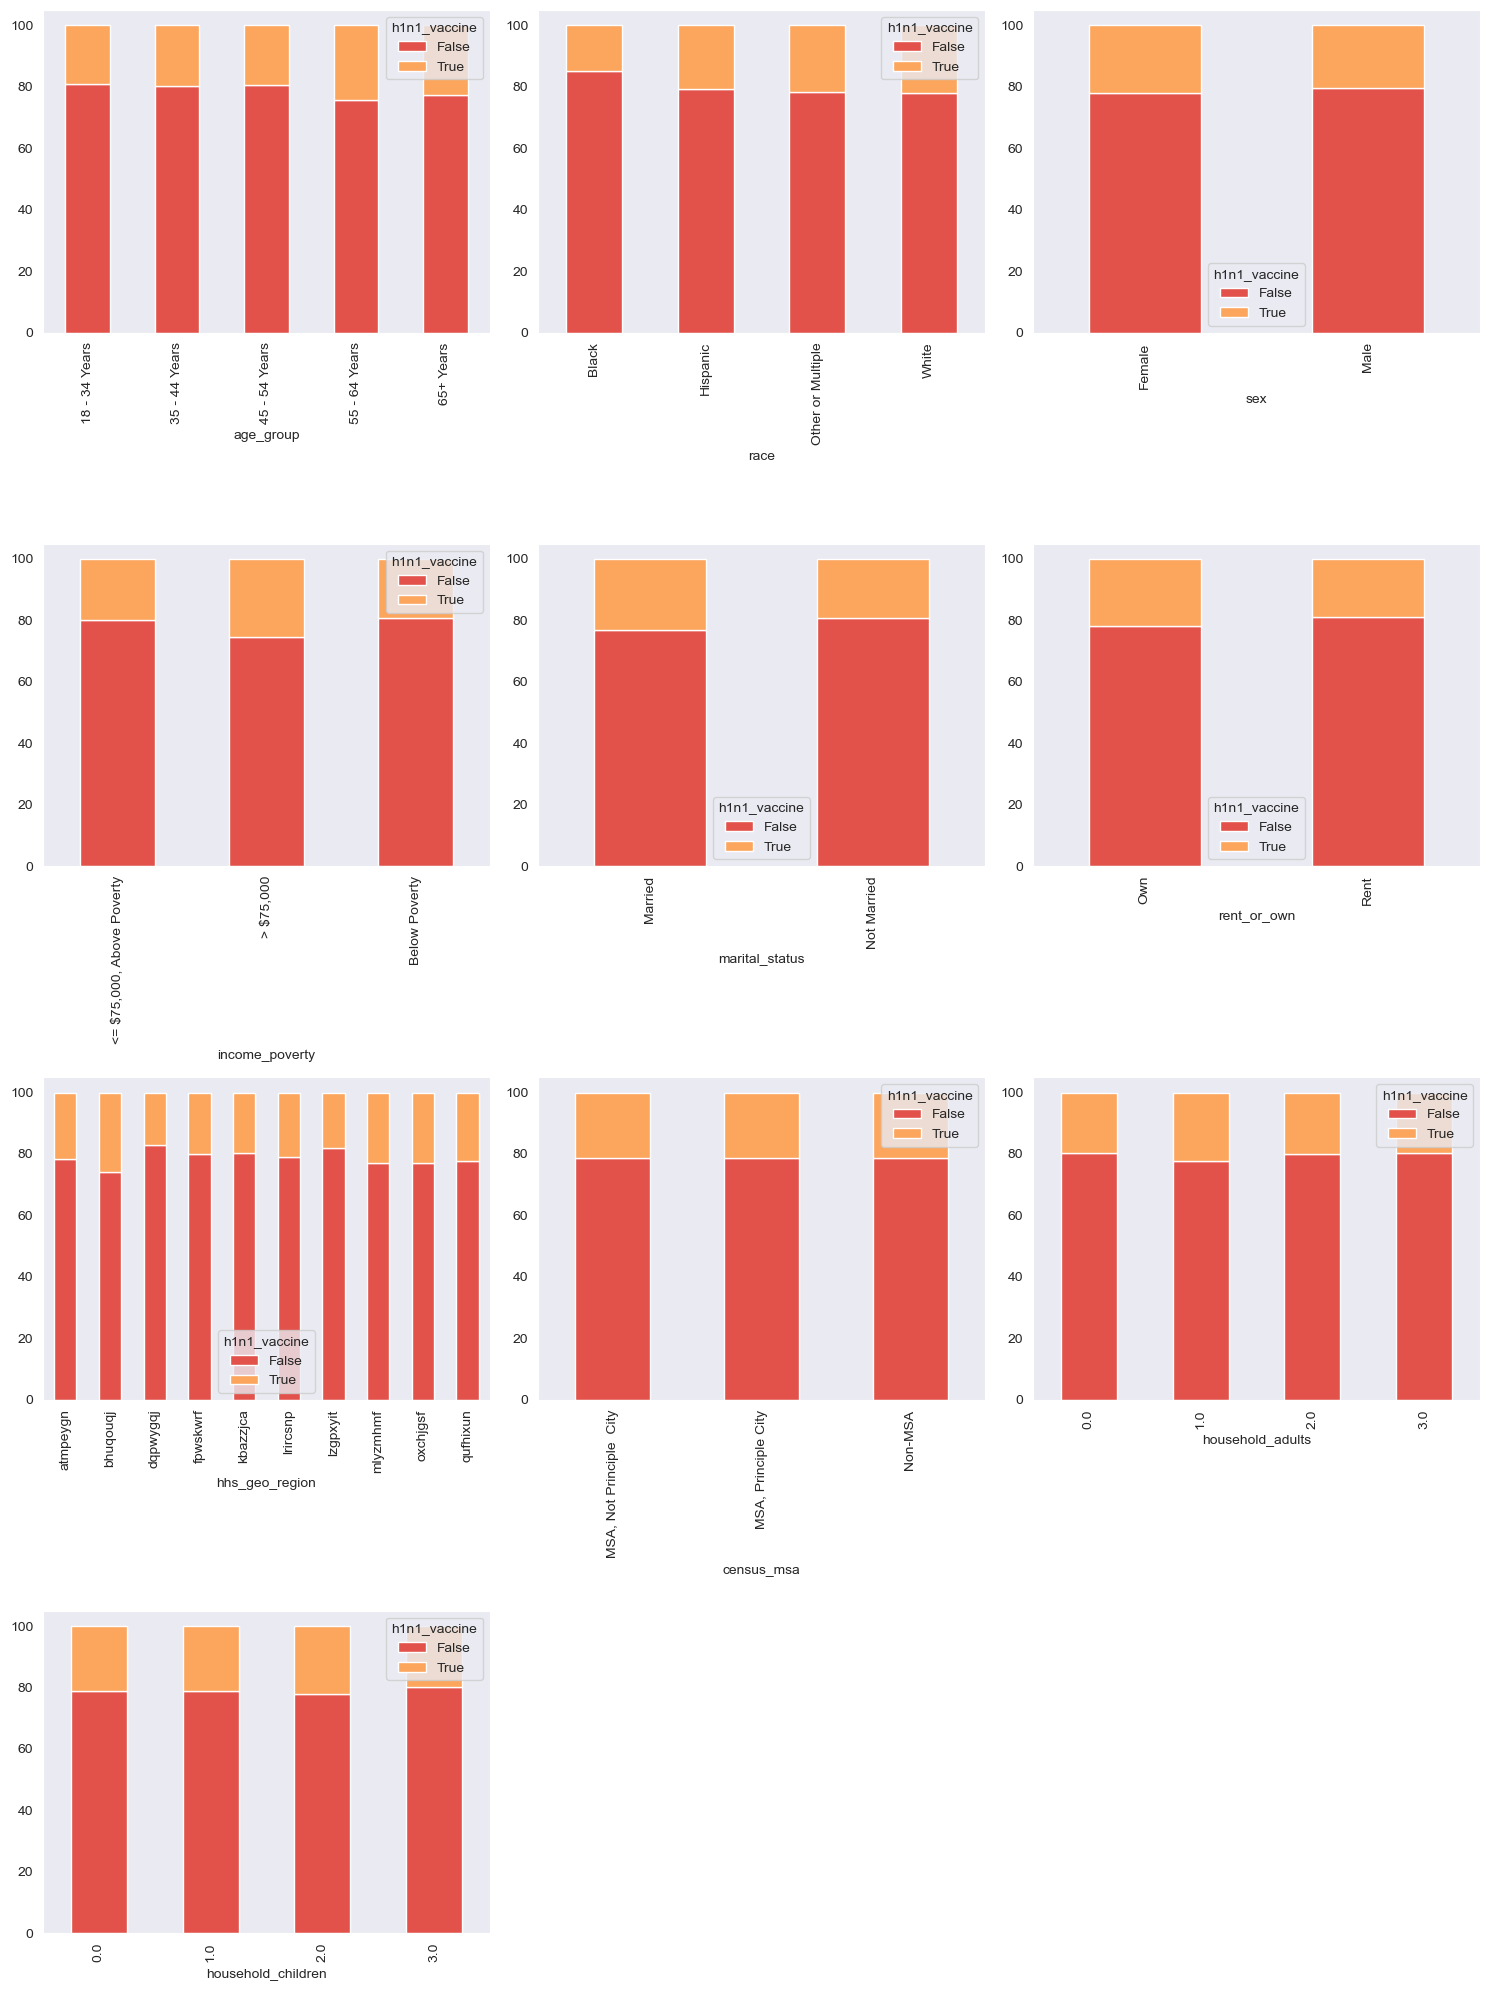

In [53]:
categorical_features = ['age_group', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children']

n_features =len(categorical_features)
n_cols =3
n_rows= (n_features +n_cols-1) //n_cols

fig,axes = plt.subplots(n_rows,n_cols,figsize=(15,n_rows*5))

for idx, feature in enumerate(categorical_features):
    row,col = idx//n_cols,idx%n_cols
    ax = axes[row,col]

    table_1 = pd.crosstab(df[feature],df["h1n1_vaccine"])
    table_1 = table_1.div(table_1.sum(axis=1),axis=0)*100
    table_1.plot.bar(ax=ax,stacked=True)
    plt.ylabel("percentage")
    plt.xlabel(feature)

for idx in range(n_features,n_rows*n_cols):
    row,col = idx//n_cols,idx%n_cols
    fig.delaxes(axes[row,col])
plt.tight_layout()
plt.show()

In [54]:
import plotly.express as px

fig = px.histogram(df,x="age_group",histnorm="probability")
fig.update_layout()
fig.show()

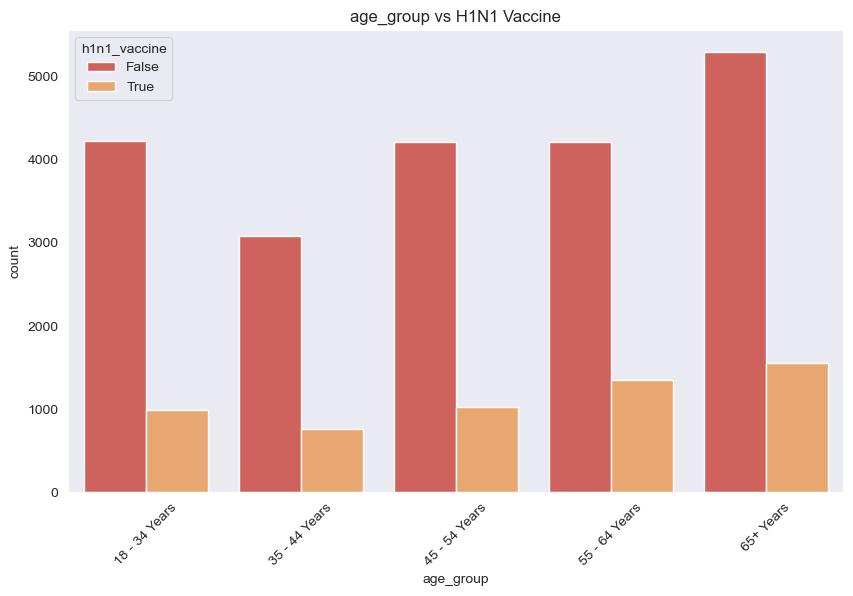

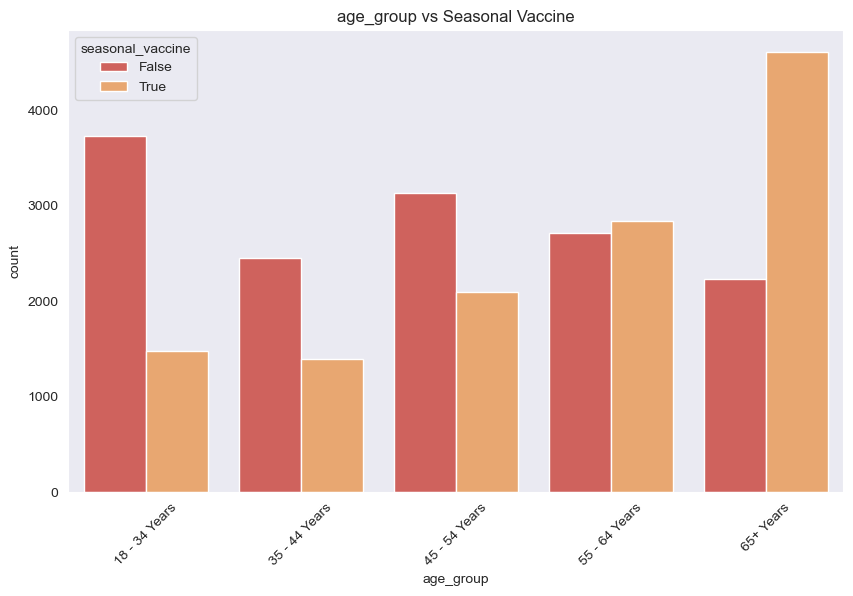

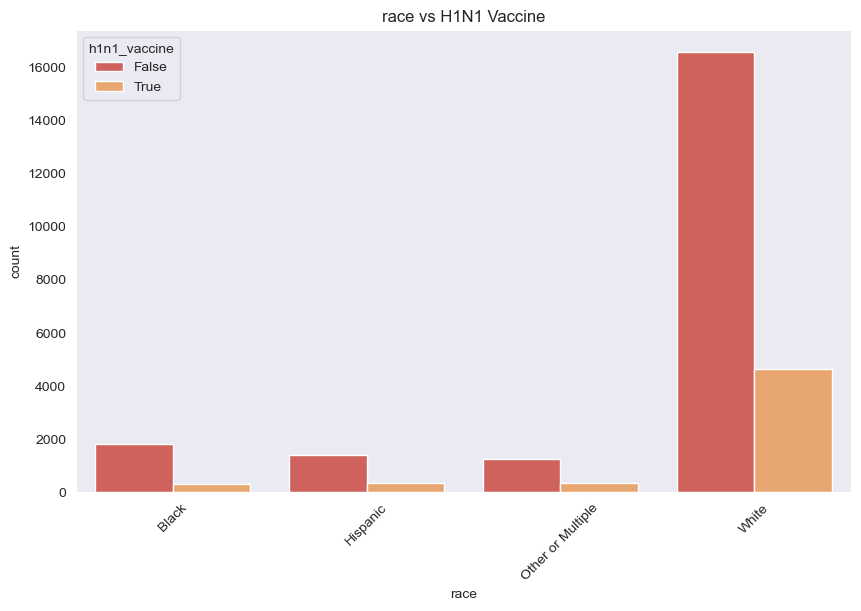

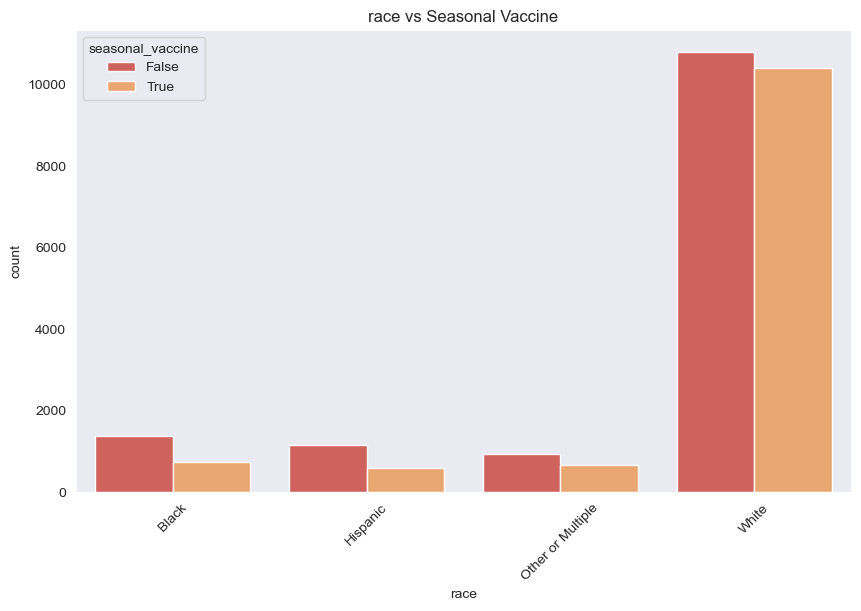

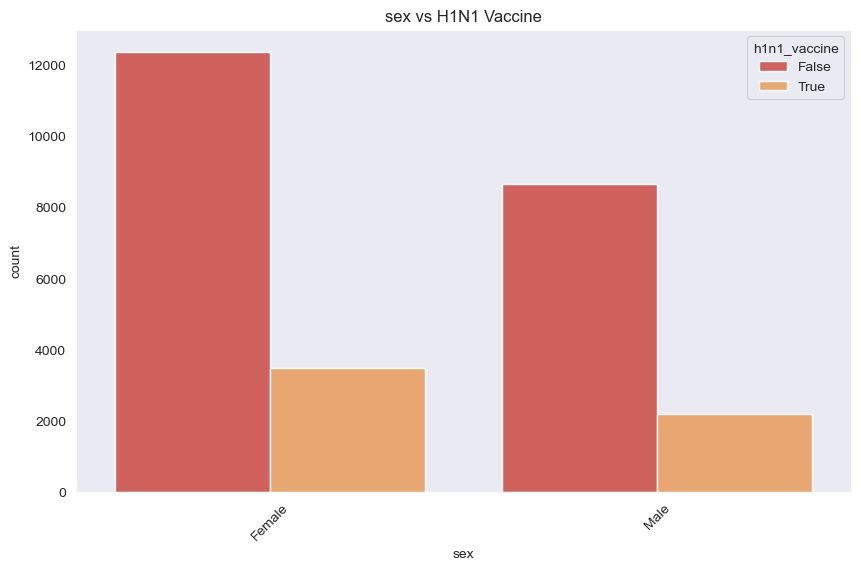

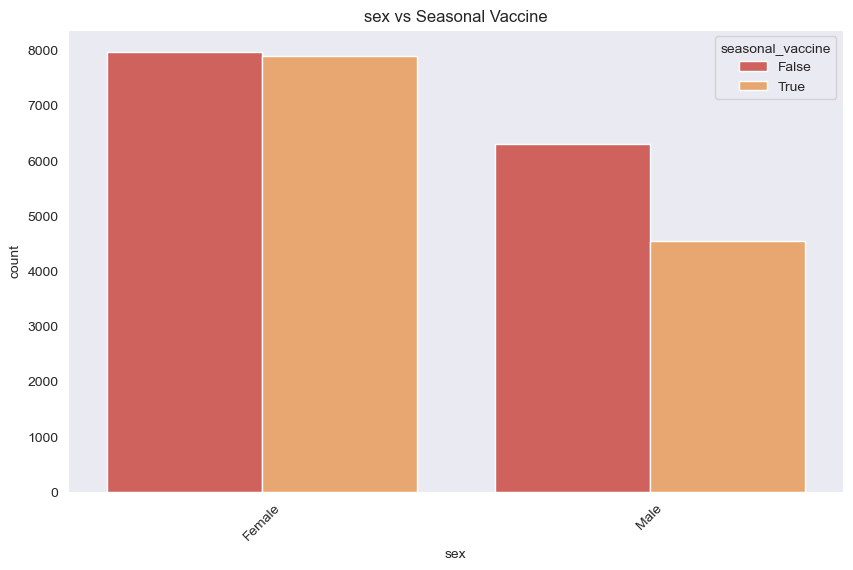

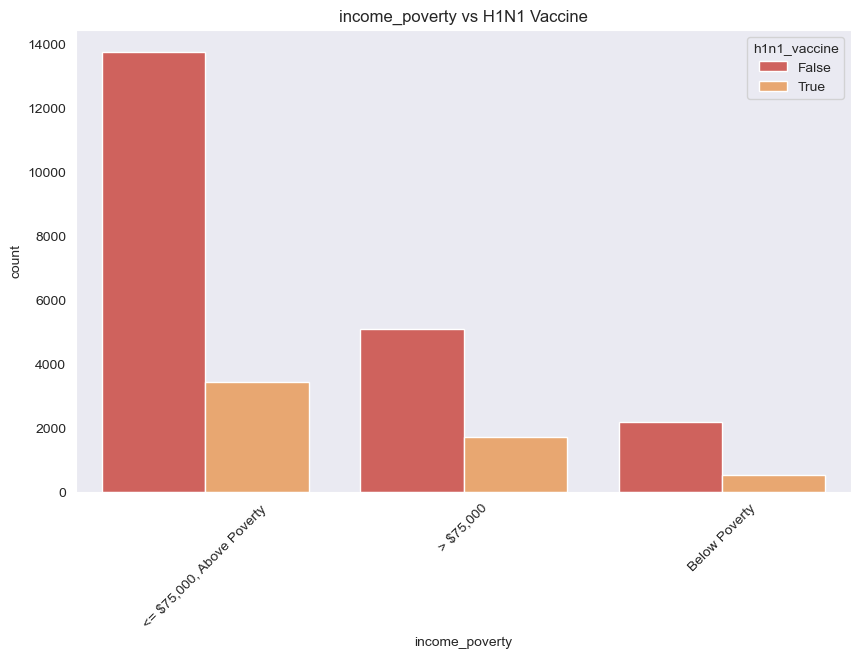

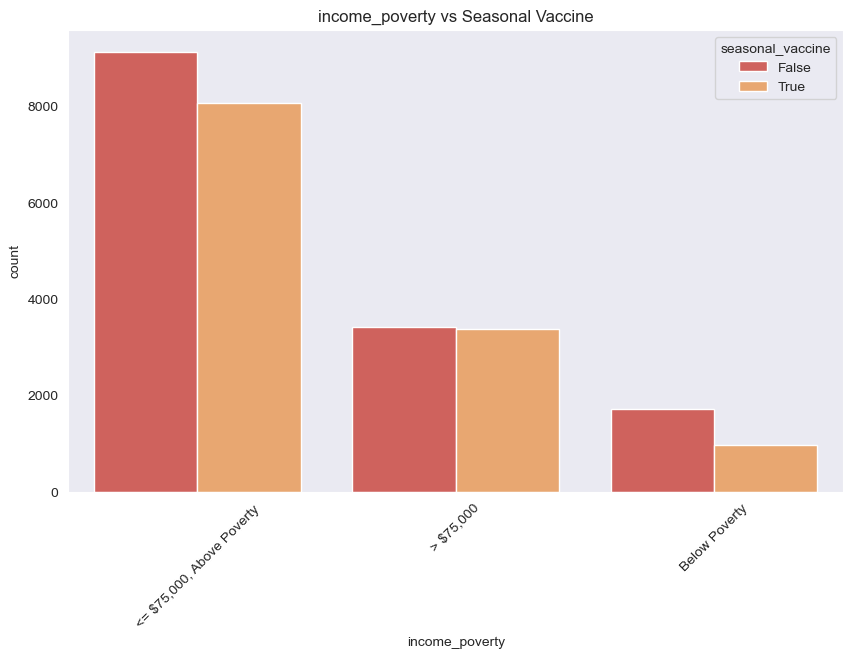

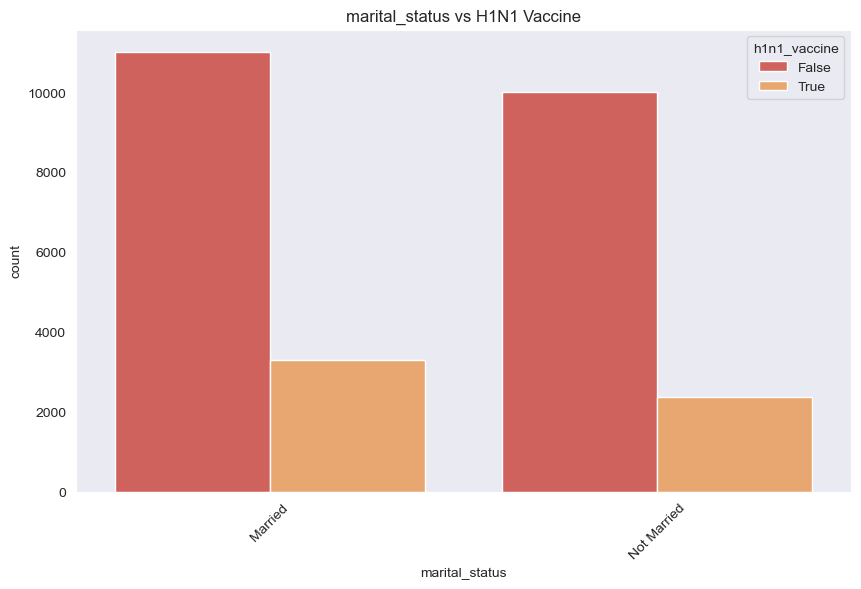

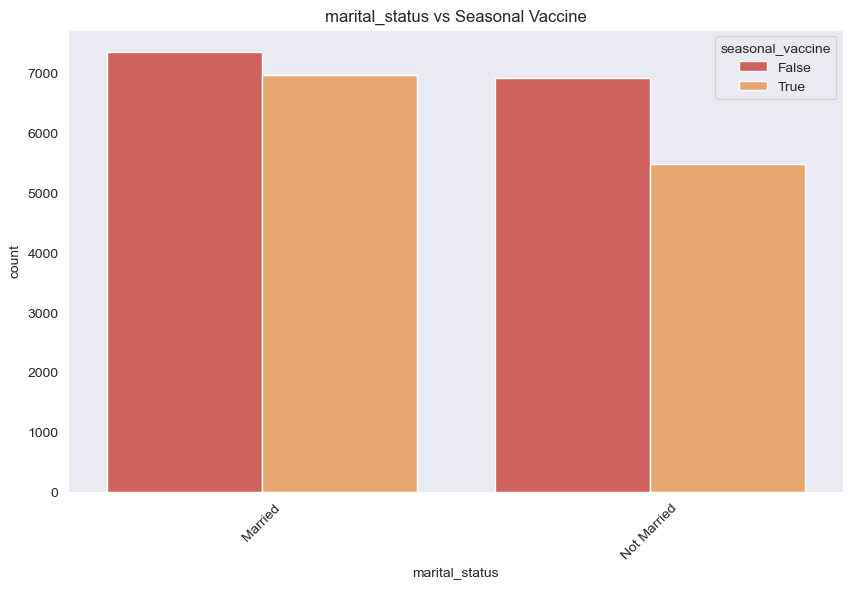

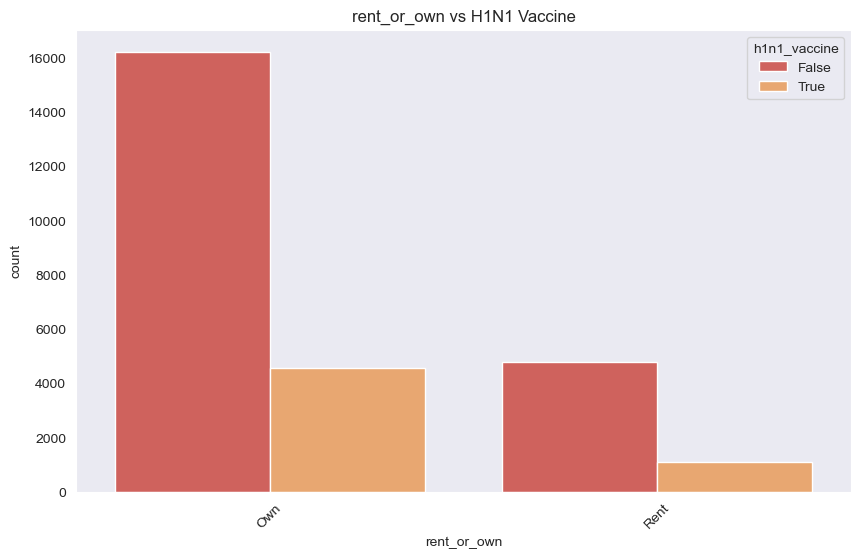

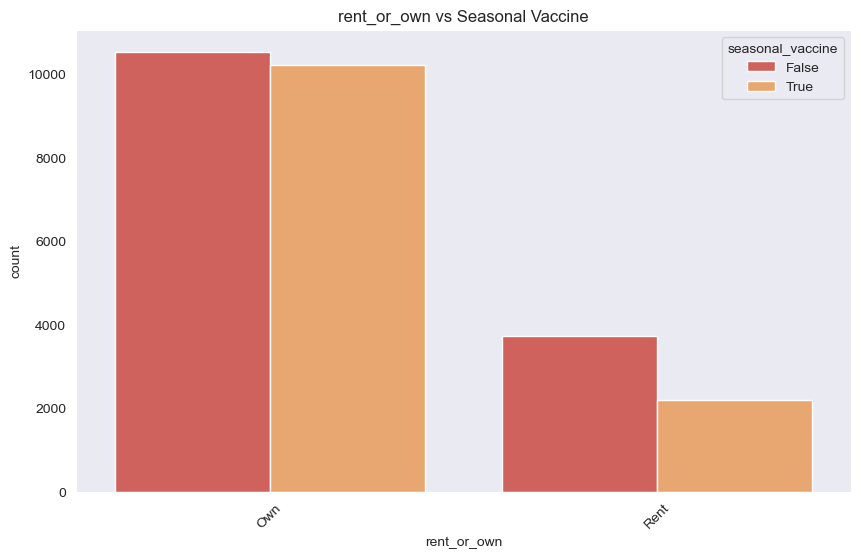

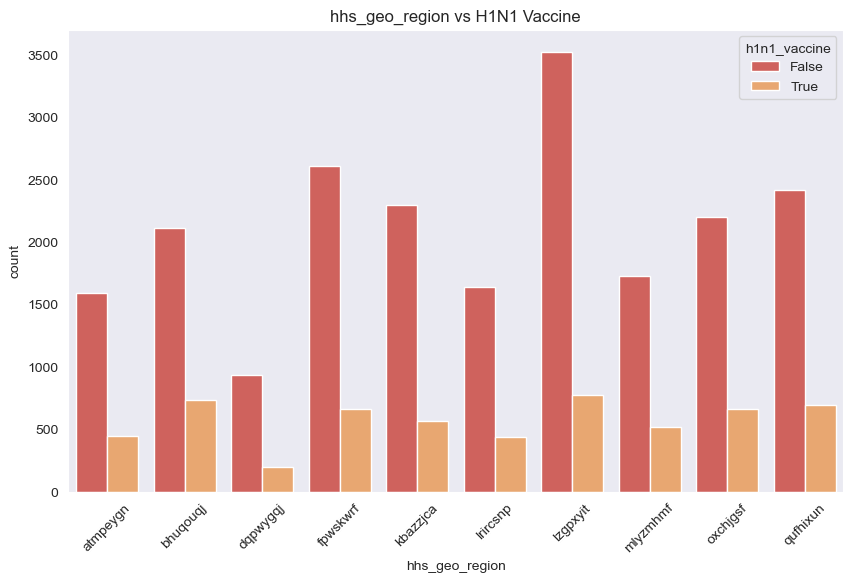

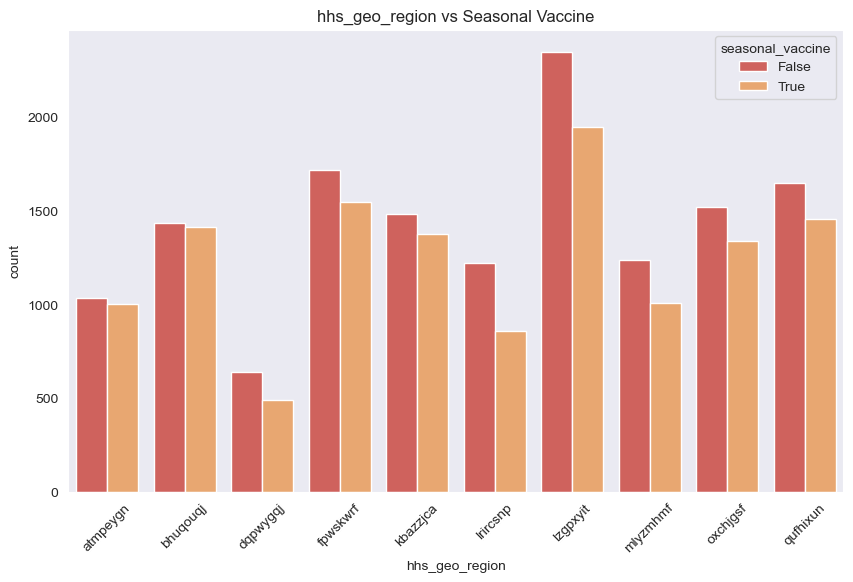

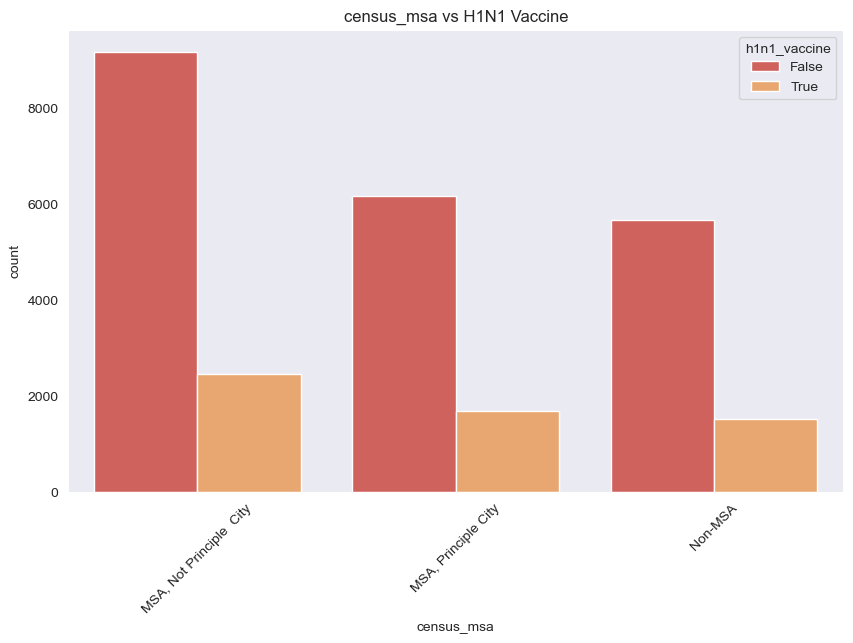

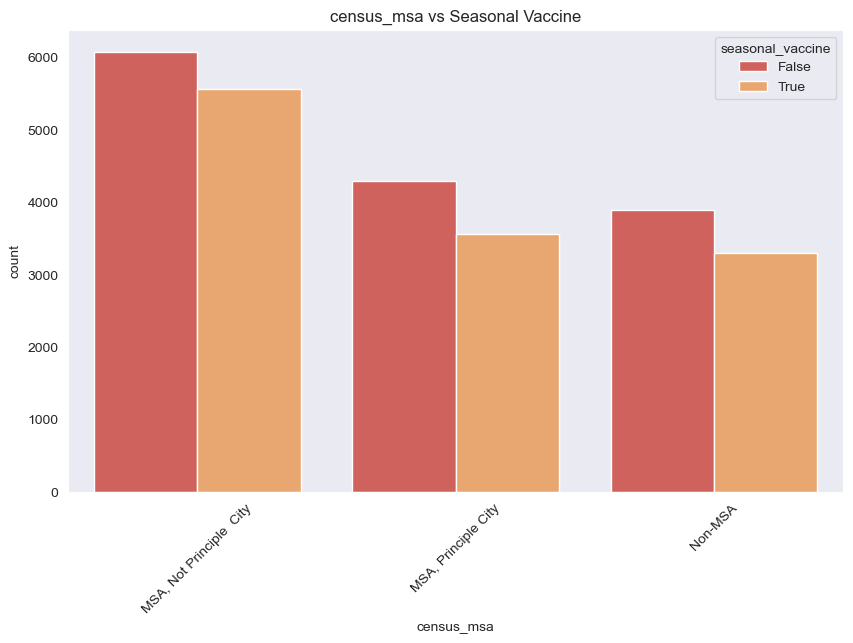

C:\Users\r-a-a\anaconda3\envs\cw1\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.

C:\Users\r-a-a\anaconda3\envs\cw1\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



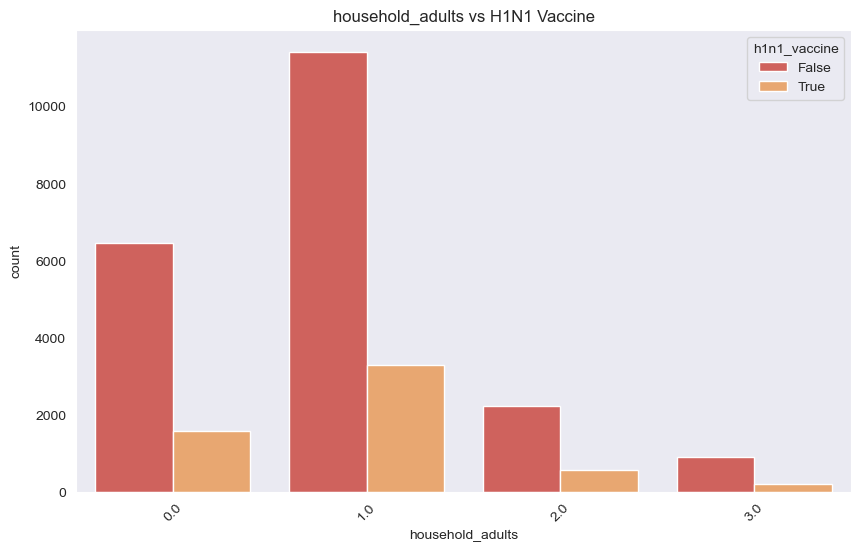

C:\Users\r-a-a\anaconda3\envs\cw1\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



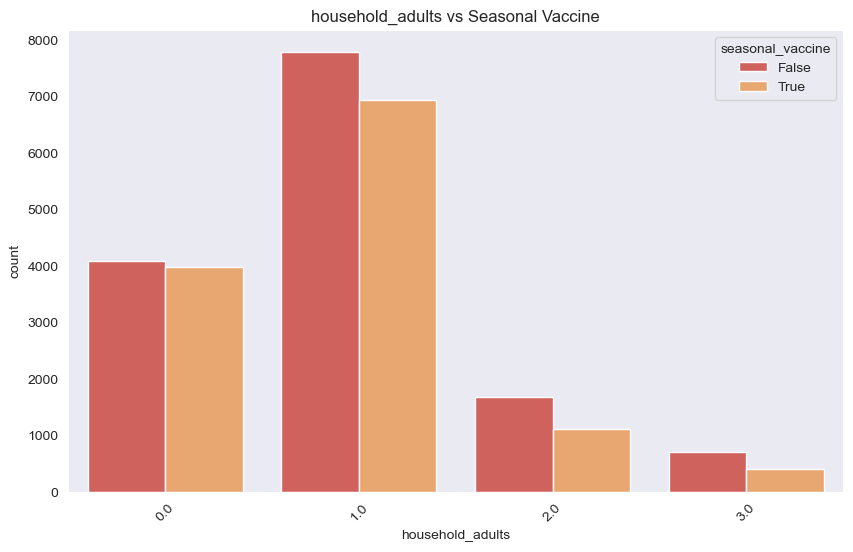

C:\Users\r-a-a\anaconda3\envs\cw1\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



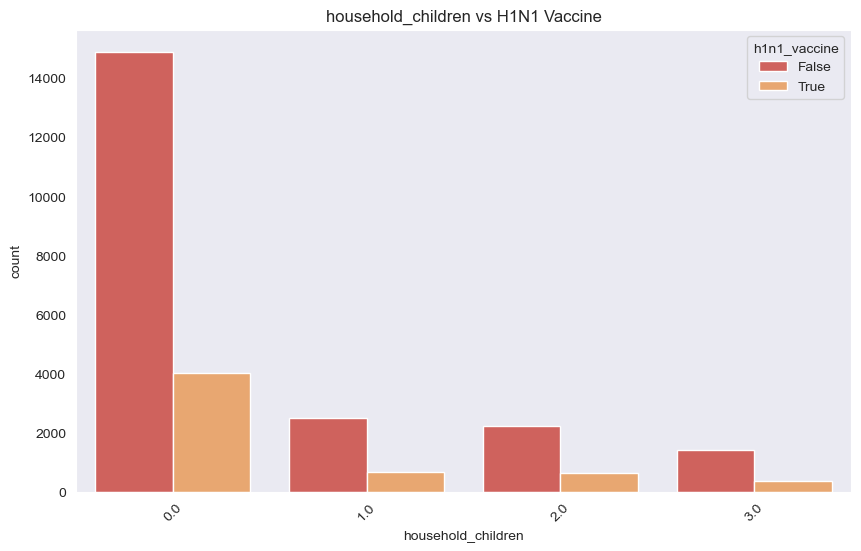

C:\Users\r-a-a\anaconda3\envs\cw1\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



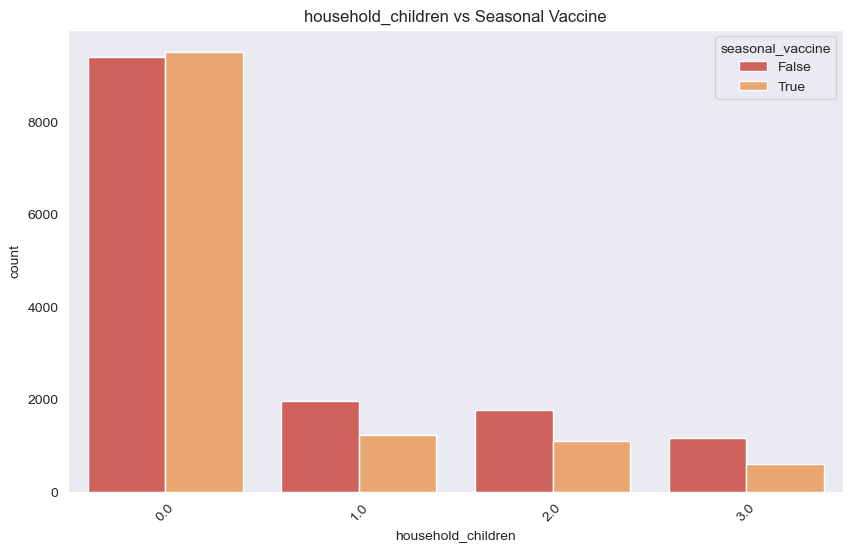

In [55]:
# Relationship between categorical features and target variables
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='h1n1_vaccine', data=df)
    plt.title(f"{feature} vs H1N1 Vaccine")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='seasonal_vaccine', data=df)
    plt.title(f"{feature} vs Seasonal Vaccine")
    plt.xticks(rotation=45)
    plt.show()


Features with cardinality greater than 2, except race, employment_status, hhs_geo_region, census_msa, employment_industry and employment_occupation are ordinal categoricals. All binary features, and race, employment_status, hhs_geo_region, census_msa, employment_industry and employment_occupation are nominal categoricals.
cat_cols = [
    'race',
    'sex',
    'marital_status',
    'rent_or_own',
    'hhs_geo_region',
    'census_msa',
    'employment_industry',
    'employment_occupation'
]

ord_cols = [
    'age_group',
    'education',
    'income_poverty',
    'employment_status'
]

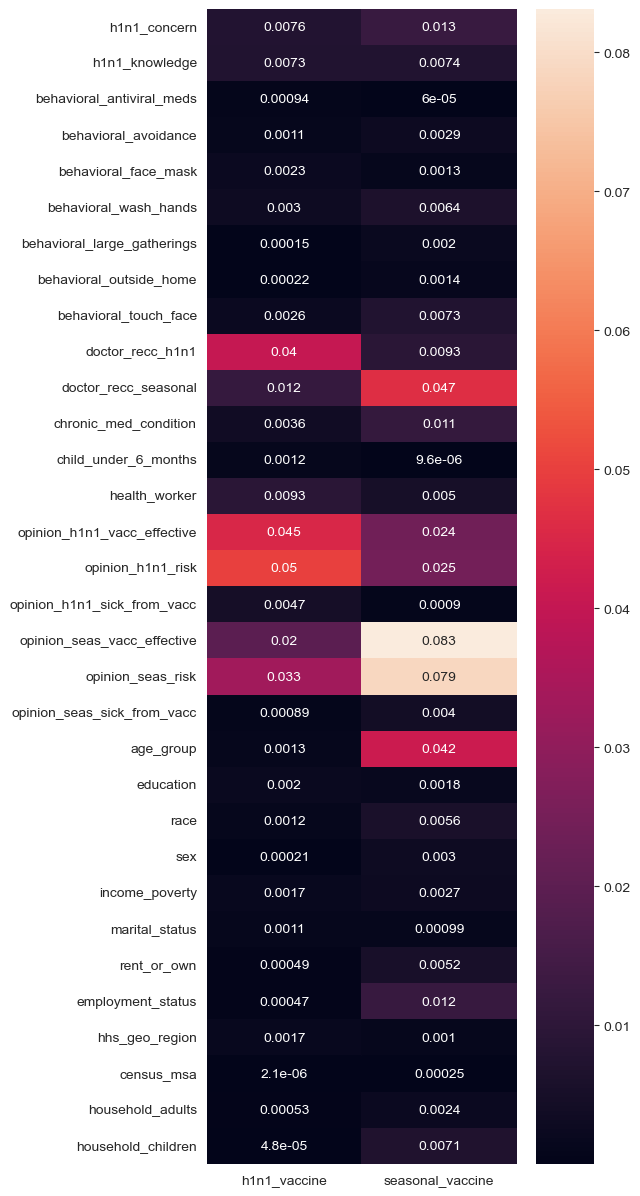

In [56]:
# Import the necessary library
from sklearn.metrics import mutual_info_score

# Separate the target columns from the rest of the columns
target_columns = ['h1n1_vaccine', 'seasonal_vaccine']
feature_columns = [col for col in df.columns if col not in target_columns]

# Compute the mutual information between each feature and the two target columns
mutual_info_df = pd.DataFrame(
    {target_col: [mutual_info_score(df.loc[df[feature_col].notna(), target_col], df.loc[df[feature_col].notna(), feature_col].astype('category').cat.codes)
                  for feature_col in feature_columns]
     for target_col in target_columns},
    index=feature_columns)

# Create a heatmap to visualize the mutual information
plt.figure(figsize=(5, 15))
sns.heatmap(mutual_info_df, annot=True)
plt.show()


In [57]:
from sklearn.metrics import mutual_info_score

# Calculate mutual information between the two target variables
mi_targets = mutual_info_score(df['h1n1_vaccine'], df['seasonal_vaccine'])

print(f"Mutual information between h1n1_vaccine and seasonal_vaccine: {mi_targets:.4f}")


Mutual information between h1n1_vaccine and seasonal_vaccine: 0.0751


In [58]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of categorical columns in your dataset
categorical_columns = [
    'age_group',
    'education',
    'race',
    'sex',
    'income_poverty',
    'marital_status',
    'rent_or_own',
    'employment_status',
    'hhs_geo_region',
    'census_msa'
]

# Create subplots with a 5x2 grid
fig = make_subplots(rows=5, cols=2, subplot_titles=categorical_columns)

# Loop through categorical columns and add bar charts as subplots
for index, column in enumerate(categorical_columns):
    counts = df[column].value_counts().reset_index().rename(columns={'index': column, column: 'count'})
    row, col = divmod(index, 2)
    fig.add_trace(
        go.Bar(
            x=counts[column],
            y=counts['count'],
            name=column,
            text=counts['count'],
            textposition='auto'
        ),
        row=row+1, col=col+1
    )

# Update layout
fig.update_layout(title='Bar Charts for Categorical Columns', height=1500)
fig.show()

In [59]:
# List of binary columns in your dataset
binary_columns = [
    'behavioral_antiviral_meds',
    'behavioral_avoidance',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_large_gatherings',
    'behavioral_outside_home',
    'behavioral_touch_face',
    'doctor_recc_h1n1',
    'doctor_recc_seasonal',
    'chronic_med_condition',
    'child_under_6_months',
    'health_worker'
]

# Create subplots with a 4x3 grid
fig = make_subplots(rows=4, cols=3, specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]]*4, subplot_titles=binary_columns)

# Loop through binary columns and add pie charts as subplots
for index, column in enumerate(binary_columns):
    counts = df[column].value_counts().reset_index().rename(columns={'index': column, column: 'count'})
    row, col = divmod(index, 3)


    fig.add_trace(
        go.Pie(
            labels=['No', 'Yes'],
            values=counts['count'],
            name=column,
            textinfo='label+percent',
            insidetextorientation='radial',
            #domain=dict(x=x_domain, y=y_domain)
        ),
        row=row+1, col=col+1
    )

# Update layout
fig.update_layout(title='Pie Charts for Binary Columns', height=1600)
fig.show()

In [60]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Calculate the number of individuals who received the H1N1 vaccine by age_group and education
h1n1_vaccinated = df[df['h1n1_vaccine'] == 1]
h1n1_pivot = pd.pivot_table(h1n1_vaccinated, values='h1n1_vaccine', index=['age_group'], columns=['education'], aggfunc='count', fill_value=0)

# Calculate the number of individuals who received the seasonal vaccine by age_group and education
seasonal_vaccinated = df[df['seasonal_vaccine'] == 1]
seasonal_pivot = pd.pivot_table(seasonal_vaccinated, values='seasonal_vaccine', index=['age_group'], columns=['education'], aggfunc='count', fill_value=0)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("H1N1 Vaccine", "Seasonal Vaccine"), horizontal_spacing=0.3)

# Add H1N1 heatmap
fig.add_trace(
    go.Heatmap(
        z=h1n1_pivot.values,
        x=h1n1_pivot.columns,
        y=h1n1_pivot.index,
        colorscale="Viridis",
        name="H1N1 Vaccine",
        colorbar=dict(x=0.37, xanchor='left'),
        showscale=True,

    ),
    row=1, col=1
)

# Add seasonal vaccine heatmap
fig.add_trace(
    go.Heatmap(
        z=seasonal_pivot.values,
        x=seasonal_pivot.columns,
        y=seasonal_pivot.index,
        colorscale="Viridis",
        name="Seasonal Vaccine",
        colorbar=dict(x=1.22, xanchor='right'),
        showscale=True,
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(title='Number of Individuals Who Received Vaccines by Age Group and Education', xaxis_title='Education', yaxis_title='Age Group')

# Show the plot
fig.show()

In [61]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Calculate the number of individuals who received the H1N1 vaccine by age_group and education
h1n1_vaccinated = df[df['h1n1_vaccine'] == 1]
h1n1_pivot = pd.pivot_table(h1n1_vaccinated, values='h1n1_vaccine', index=['income_poverty'], columns=['household_adults'], aggfunc='count', fill_value=0)

# Calculate the number of individuals who received the seasonal vaccine by age_group and education
seasonal_vaccinated = df[df['seasonal_vaccine'] == 1]
seasonal_pivot = pd.pivot_table(seasonal_vaccinated, values='seasonal_vaccine', index=['income_poverty'], columns=['household_adults'], aggfunc='count', fill_value=0)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("H1N1 Vaccine", "Seasonal Vaccine"), horizontal_spacing=0.3)

# Add H1N1 heatmap
fig.add_trace(
    go.Heatmap(
        z=h1n1_pivot.values,
        x=h1n1_pivot.columns,
        y=h1n1_pivot.index,
        colorscale="Viridis",
        name="H1N1 Vaccine",
        colorbar=dict(x=0.37, xanchor='left'),
        showscale=True,

    ),
    row=1, col=1
)

# Add seasonal vaccine heatmap
fig.add_trace(
    go.Heatmap(
        z=seasonal_pivot.values,
        x=seasonal_pivot.columns,
        y=seasonal_pivot.index,
        colorscale="Viridis",
        name="Seasonal Vaccine",
        colorbar=dict(x=1.22, xanchor='right'),
        showscale=True,
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(title='Number of Individuals Who Received Vaccines by Age Group and Education', xaxis_title='Education', yaxis_title='Age Group')

# Show the plot
fig.show()

In [62]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Calculate the number of individuals who received the H1N1 vaccine by age_group and education
h1n1_vaccinated = df[df['h1n1_vaccine'] == 1]
h1n1_pivot = pd.pivot_table(h1n1_vaccinated, values='h1n1_vaccine', index=['income_poverty'], columns=['employment_status'], aggfunc='count', fill_value=0)

# Calculate the number of individuals who received the seasonal vaccine by age_group and education
seasonal_vaccinated = df[df['seasonal_vaccine'] == 1]
seasonal_pivot = pd.pivot_table(seasonal_vaccinated, values='seasonal_vaccine', index=['income_poverty'], columns=['employment_status'], aggfunc='count', fill_value=0)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("H1N1 Vaccine", "Seasonal Vaccine"), horizontal_spacing=0.3)

# Add H1N1 heatmap
fig.add_trace(
    go.Heatmap(
        z=h1n1_pivot.values,
        x=h1n1_pivot.columns,
        y=h1n1_pivot.index,
        colorscale="Viridis",
        name="H1N1 Vaccine",
        colorbar=dict(x=0.37, xanchor='left'),
        showscale=True,

    ),
    row=1, col=1
)

# Add seasonal vaccine heatmap
fig.add_trace(
    go.Heatmap(
        z=seasonal_pivot.values,
        x=seasonal_pivot.columns,
        y=seasonal_pivot.index,
        colorscale="Viridis",
        name="Seasonal Vaccine",
        colorbar=dict(x=1.22, xanchor='right'),
        showscale=True,
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(title='Number of Individuals Who Received Vaccines by Age Group and Education', xaxis_title='Education', yaxis_title='Age Group')

# Show the plot
fig.show()

## write findings, change titles for all

# 3. Feature Selection

- Q4: Research question: How can we leverage the provided dataset features to predict an individual's likelihood of receiving the H1N1 and seasonal flu vaccines and identify key factors influencing vaccination decisions?
- Sub-question 1: "Which demographic, socioeconomic, and behavioural features are the strongest predictors of an individual's likelihood to receive the H1N1 and seasonal flu vaccines, and how do these predictors differ between the two vaccines?"
- Sub-question 2: "How do individuals' opinions about vaccine effectiveness, risk perception, and concerns about side effects influence their likelihood of receiving the H1N1 and seasonal flu vaccines, and how can this information be used to improve public health communication strategies?"


In [63]:
#Approaches for feature selection:
"""
1. Filter Methods: mutual information approach
2. Wrapper methods: Recursive Feature Elimination :it is highly iterative and time consuming
3. Embedded Methods: Tree based models feature selection is done automatically
4. Dimensionality Reduction: PCA


"""

'\n1. Filter Methods: mutual information approach\n2. Wrapper methods: Recursive Feature Elimination :it is highly iterative and time consuming\n3. Embedded Methods: Tree based models feature selection is done automatically\n4. Dimensionality Reduction: PCA\n\n\n'

In [64]:
# Approach Taken
"""
Embedded Method:
Embedded Methods are feature selection techniques that incorporate the feature selection process within
the model training itself. These methods aim to find the most informative features during the model training process,
considering their impact on the model's performance.

"""

"\nEmbedded Method:\nEmbedded Methods are feature selection techniques that incorporate the feature selection process within\nthe model training itself. These methods aim to find the most informative features during the model training process,\nconsidering their impact on the model's performance.\n\n"

In [65]:
# Approach Taken
# Manual Selection
df_behaviour = df[['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker','age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine']]

df_opinion =df[['h1n1_concern', 'h1n1_knowledge','doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine']]

## Baseline Predictions and getting important features


In [66]:
!pip install catboost
!pip install optuna

In [67]:
# necessary imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from tqdm import tqdm
from IPython.display import clear_output
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import optuna
from optuna.samplers import TPESampler
import warnings
warnings.filterwarnings("ignore")

In [68]:
for col in df.select_dtypes("bool").columns:
  df[col] = df[col].astype("float64")

In [69]:
# fixing encoding errors
X = df.drop(columns=["h1n1_vaccine","seasonal_vaccine"])
X = pd.get_dummies(X,drop_first=True)
X = X.rename(columns=lambda x: x.replace('$', ''))
X = X.rename(columns=lambda x: x.replace('>', '_is_greater_than_'))
X = X.rename(columns=lambda x: x.replace('<', '_is_less_than_'))
X = X.rename(columns=lambda x: x.replace(' ', '_'))
X = X.rename(columns=lambda x: x.replace('-', '_to_'))
X = X.rename(columns=lambda x: x.replace(',', ''))
X = X.rename(columns=lambda x: x.replace('.0', ''))

In [70]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import numpy as np

# defining the classifiers
classifiers ={
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Lightgbm": LGBMClassifier(random_state=42),
    "ExtraTree": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42)
}

def evaluate_classifiers(classifiers,X,y,top_n,n_splits=5):
    metrics = []
    feature_importances = []

    skf = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

    for name,clf in tqdm(classifiers.items()):

        fold_metrics = []
        fold_importances = []

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            clf_clone = clone(clf)  # clone the classifier
            clf_clone.fit(X_train,y_train)

            y_pred = clf_clone.predict(X_test)
            y_pred_proba = clf_clone.predict_proba(X_test)[:, 1]

            accuracy = accuracy_score(y_test,y_pred)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            f1 = f1_score(y_test, y_pred)

            fold_metrics.append({
                "Classifier":name,
                "Accuracy": accuracy,
                'ROC AUC': roc_auc,
                'F1 Score': f1,
            })

            if hasattr(clf_clone, 'feature_importances_'):
                fold_importances.append(clf_clone.feature_importances_)

        # Aggregate metrics over all folds for the current classifier
        metrics_df = pd.DataFrame(fold_metrics)
        metrics.append(metrics_df.mean().to_dict())

        # Aggregate feature importances over all folds for the current classifier
        feature_importances_df = pd.DataFrame(fold_importances, columns=X_train.columns)
        feature_importances.append(feature_importances_df.mean().to_frame(name=name))

    # Combine feature importances from all classifiers
    feature_importances_df = pd.concat(feature_importances, axis=1)
    feature_importances_combined = feature_importances_df.mean(axis=1).sort_values(ascending=False)

    top_features = feature_importances_combined[:top_n]
    metrics_df = pd.DataFrame(metrics)
    return metrics_df, top_features


In [71]:
y = df["h1n1_vaccine"]
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Assuming you have imported the necessary libraries and defined the classifiers and data variables
metrics_df, top_features_all_h1n1 = evaluate_classifiers(classifiers, X,y, top_n=20)

clear_output()
print("Results for H1N1 Vaccine")
print("Evaluation Metrics:")
print(metrics_df)
print("\nTop 20 Common Features:")
print(top_features_all_h1n1)
# results = evaluate_classifiers(classifiers,X_train,X_test,y_train,y_test)
# print(results)

Results for H1N1 Vaccine
Evaluation Metrics:
   Accuracy   ROC AUC  F1 Score
0  0.742914  0.628867  0.415693
1  0.823979  0.806543  0.441083
2  0.827686  0.822788  0.493355
3  0.820834  0.803618  0.423988
4  0.820909  0.802792  0.493142
5  0.827012  0.819471  0.494095

Top 20 Common Features:
opinion_h1n1_vacc_effective             35.538260
opinion_h1n1_risk                       29.405391
opinion_h1n1_sick_from_vacc             25.733839
h1n1_concern                            24.677103
opinion_seas_risk                       24.521200
opinion_seas_sick_from_vacc             22.501612
opinion_seas_vacc_effective             22.295763
h1n1_knowledge                          18.737746
doctor_recc_h1n1                        18.457840
doctor_recc_seasonal                    16.719682
health_worker                           16.148900
chronic_med_condition                   11.118215
sex_Male                                11.052668
age_group_65+_Years                      9.893312
marita

In [72]:
y = df["seasonal_vaccine"]
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# Assuming you have imported the necessary libraries and defined the classifiers and data variables
metrics_df, top_features_all_seasonal = evaluate_classifiers(classifiers, X,y ,top_n=20)

clear_output()
print("Results for Seasonal Vaccine")
print("Evaluation Metrics:")
print(metrics_df)
print("\nTop 20 Common Features:")
print(top_features_all_seasonal)

Results for Seasonal Vaccine
Evaluation Metrics:
   Accuracy   ROC AUC  F1 Score
0  0.673794  0.672186  0.649394
1  0.766878  0.840038  0.744874
2  0.776725  0.850747  0.757613
3  0.764968  0.838014  0.741980
4  0.764294  0.836335  0.744328
5  0.776276  0.850380  0.755551

Top 20 Common Features:
opinion_seas_risk                         39.697692
opinion_seas_sick_from_vacc               29.659408
opinion_seas_vacc_effective               28.204540
opinion_h1n1_vacc_effective               23.488840
opinion_h1n1_risk                         22.521089
age_group_65+_Years                       21.653634
opinion_h1n1_sick_from_vacc               21.207126
doctor_recc_seasonal                      18.653195
h1n1_knowledge                            18.635669
h1n1_concern                              18.087877
health_worker                             16.757938
chronic_med_condition                     13.418473
age_group_55__to__64_Years                12.255146
doctor_recc_h1n1          

## Predictions with Selected Features [Manual Method] + Hyperparameter tuning (Grid Search Method)

In [73]:
# Define hyperparameter grids
param_grid_dt = {
    # 'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    # 'n_estimators': [100, 200, 500],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8],
    # 'criterion' :['gini', 'entropy']
}

param_grid_lgbm = {
    # 'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    # 'learning_rate': [0.01, 0.1, 0.2]
}

param_grid_et = {
    # 'n_estimators': [100, 200, 500],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8],
    # 'criterion' :['gini', 'entropy']
}

param_grid_xgb = {
    # 'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    # 'learning_rate': [0.01, 0.1, 0.2]
}

param_grid_cat = {
    'depth': [4, 7, 10],
    # 'learning_rate' : [0.03, 0.1, 0.15],
    # 'l2_leaf_reg': [1,4,9],
    # 'iterations': [300]
}

param_grids = {
    "Decision Tree": param_grid_dt,
    "Random Forest": param_grid_rf,
    "Lightgbm": param_grid_lgbm,
    "ExtraTree": param_grid_et,
    "XGBoost": param_grid_xgb,
    "CatBoost": param_grid_cat
}

In [74]:
# defining the classifiers
classifiers ={
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Lightgbm": LGBMClassifier(random_state=42),
    "ExtraTree": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42)
}

def evaluate_classifiers(classifiers, param_grids, X, y, n_splits=5):
    metrics = []

    skf = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

    for name, clf in tqdm(classifiers.items()):
        metrics_per_fold = []

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            grid_search = GridSearchCV(clf, param_grids[name], cv=skf, n_jobs=-1, verbose=3)
            grid_search.fit(X_train, y_train)

            best_clf = grid_search.best_estimator_

            y_pred = best_clf.predict(X_test)
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1]

            accuracy = accuracy_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            f1 = f1_score(y_test, y_pred)

            metrics_per_fold.append({
                "Classifier": name,
                "Accuracy": accuracy,
                'ROC AUC': roc_auc,
                'F1 Score': f1,
                'Best Params': grid_search.best_params_
            })

        # Average metrics over all folds
        df_metrics = pd.DataFrame(metrics_per_fold)
        avg_metrics = df_metrics.mean().to_dict()
        avg_metrics["Classifier"] = name
        metrics.append(avg_metrics)

    metrics_df = pd.DataFrame(metrics)
    return metrics_df

### Behavioral Features

In [75]:
# fixing encoding errors
X = df_behaviour.drop(columns=["h1n1_vaccine","seasonal_vaccine"])
X = pd.get_dummies(X,drop_first=True)
X = X.rename(columns=lambda x: x.replace('$', ''))
X = X.rename(columns=lambda x: x.replace('>', '_is_greater_than_'))
X = X.rename(columns=lambda x: x.replace('<', '_is_less_than_'))
X = X.rename(columns=lambda x: x.replace(' ', '_'))
X = X.rename(columns=lambda x: x.replace('-', '_to_'))
X = X.rename(columns=lambda x: x.replace(',', ''))
X = X.rename(columns=lambda x: x.replace('.0', ''))

In [76]:
y = df["h1n1_vaccine"]
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# Assuming you have imported the necessary libraries and defined the classifiers and data variables
metrics_df = evaluate_classifiers(classifiers,param_grids, X,y)

clear_output()
print("Results for H1N1 Vaccine")
print("Evaluation Metrics:")
print(metrics_df)

Results for H1N1 Vaccine
Evaluation Metrics:
   Accuracy   ROC AUC  F1 Score     Classifier
0  0.791478  0.725542  0.266552  Decision Tree
1  0.791328  0.740572  0.059696  Random Forest
2  0.796046  0.746519  0.314363       Lightgbm
3  0.790916  0.740081  0.052244      ExtraTree
4  0.791777  0.731470  0.340245        XGBoost
5  0.797731  0.748735  0.302383       CatBoost


In [77]:
y = df["seasonal_vaccine"]
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# Assuming you have imported the necessary libraries and defined the classifiers and data variables
metrics_df = evaluate_classifiers(classifiers,param_grids, X,y)

clear_output()
print("Results for Seasonal Vaccine")
print("Evaluation Metrics:")
print(metrics_df)

Results for Seasonal Vaccine
Evaluation Metrics:
   Accuracy   ROC AUC  F1 Score     Classifier
0  0.689557  0.747534  0.651727  Decision Tree
1  0.698207  0.763710  0.659392  Random Forest
2  0.702026  0.769616  0.671345       Lightgbm
3  0.697270  0.761370  0.659920      ExtraTree
4  0.693713  0.757916  0.663238        XGBoost
5  0.705920  0.771208  0.674674       CatBoost


### Opinion Features

In [78]:
# fixing encoding errors
X = df_opinion.drop(columns=["h1n1_vaccine","seasonal_vaccine"])
X = pd.get_dummies(X,drop_first=True)
X = X.rename(columns=lambda x: x.replace('$', ''))
X = X.rename(columns=lambda x: x.replace('>', '_is_greater_than_'))
X = X.rename(columns=lambda x: x.replace('<', '_is_less_than_'))
X = X.rename(columns=lambda x: x.replace(' ', '_'))
X = X.rename(columns=lambda x: x.replace('-', '_to_'))
X = X.rename(columns=lambda x: x.replace(',', ''))
X = X.rename(columns=lambda x: x.replace('.0', ''))

In [79]:
y = df["h1n1_vaccine"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# Assuming you have imported the necessary libraries and defined the classifiers and data variables
metrics_df = evaluate_classifiers(classifiers,param_grids, X,y)
clear_output()
print("Results for H1N1 Vaccine")
print("Evaluation Metrics:")
print(metrics_df)

Results for H1N1 Vaccine
Evaluation Metrics:
   Accuracy   ROC AUC  F1 Score     Classifier
0  0.818662  0.793472  0.413420  Decision Tree
1  0.817838  0.811398  0.353480  Random Forest
2  0.828509  0.822196  0.494927       Lightgbm
3  0.810200  0.809770  0.271570      ExtraTree
4  0.824765  0.811691  0.495633        XGBoost
5  0.828846  0.822795  0.494126       CatBoost


In [80]:
y = df["seasonal_vaccine"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# Assuming you have imported the necessary libraries and defined the classifiers and data variables
metrics_df = evaluate_classifiers(classifiers,param_grids, X,y)

clear_output()
print("Results for Seasonal Vaccine")
print("Evaluation Metrics:")
print(metrics_df)

Results for Seasonal Vaccine
Evaluation Metrics:
   Accuracy   ROC AUC  F1 Score     Classifier
0  0.751900  0.821397  0.727397  Decision Tree
1  0.767814  0.839904  0.741622  Random Forest
2  0.776538  0.850636  0.757164       Lightgbm
3  0.763807  0.838400  0.735519      ExtraTree
4  0.771446  0.844008  0.751952        XGBoost
5  0.778447  0.851271  0.757869       CatBoost


## Predictions with Selected Features [Embedded Method] + hyperparameter tuning



In [81]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate
import optuna
from optuna.samplers import TPESampler
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Define the objective functions
def objective_decision_tree(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'random_state': 42
    }
    clf = DecisionTreeClassifier(**params)
    scoring = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc_ovr', 'f1': 'f1_micro'}
    scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1)
    trial.set_user_attr('accuracy', np.mean(scores['test_accuracy']))
    trial.set_user_attr('roc_auc', np.mean(scores['test_roc_auc']))
    trial.set_user_attr('f1', np.mean(scores['test_f1']))
    return np.mean(scores['test_accuracy'])

def objective_random_forest(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'random_state': 42
    }
    clf = RandomForestClassifier(**params)
    scoring = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc_ovr', 'f1': 'f1_micro'}
    scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1)
    trial.set_user_attr('accuracy', np.mean(scores['test_accuracy']))
    trial.set_user_attr('roc_auc', np.mean(scores['test_roc_auc']))
    trial.set_user_attr('f1', np.mean(scores['test_f1']))
    return np.mean(scores['test_accuracy'])

def objective_extra_trees(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'random_state': 42
    }
    clf = ExtraTreesClassifier(**params)
    scoring = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc_ovr', 'f1': 'f1_micro'}
    scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1)
    trial.set_user_attr('accuracy', np.mean(scores['test_accuracy']))
    trial.set_user_attr('roc_auc', np.mean(scores['test_roc_auc']))
    trial.set_user_attr('f1', np.mean(scores['test_f1']))
    return np.mean(scores['test_accuracy'])

def objective_lightgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
        'random_state': 42
    }
    clf = LGBMClassifier(**params)
    scoring = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc_ovr', 'f1': 'f1_micro'}
    scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1)
    trial.set_user_attr('accuracy', np.mean(scores['test_accuracy']))
    trial.set_user_attr('roc_auc', np.mean(scores['test_roc_auc']))
    trial.set_user_attr('f1', np.mean(scores['test_f1']))
    return np.mean(scores['test_accuracy'])


def objective_xgboost(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'random_state': 42
    }
    clf = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    scoring = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc_ovr', 'f1': 'f1_micro'}
    scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1)
    trial.set_user_attr('accuracy', np.mean(scores['test_accuracy']))
    trial.set_user_attr('roc_auc', np.mean(scores['test_roc_auc']))
    trial.set_user_attr('f1', np.mean(scores['test_f1']))
    return np.mean(scores['test_accuracy'])

def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 1, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 5, 255),
        'random_state' : 42
    }
    clf = CatBoostClassifier(**params, verbose=False)

    scoring = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc_ovr', 'f1': 'f1_micro'}
    scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

    trial.set_user_attr('accuracy', np.mean(scores['test_accuracy']))
    trial.set_user_attr('roc_auc', np.mean(scores['test_roc_auc']))
    trial.set_user_attr('f1', np.mean(scores['test_f1']))

    # Return the mean score you want to optimize (this example uses accuracy)
    return np.mean(scores['test_accuracy'])



# Initialize the dictionary of objective functions
objective_funcs = {'Decision Tree': objective_decision_tree,
                   'Random Forest': objective_random_forest,
                   "Extra Trees":objective_extra_trees,
                   'Light GBM':objective_lightgbm,
                   "Xg Boost":objective_xgboost,
                   "Cat Boost":objective_catboost
                   }



### H1N1 Vaccine

In [82]:
X = df.drop(columns=["h1n1_vaccine","seasonal_vaccine"])
X = pd.get_dummies(X,drop_first=True)
X = X.rename(columns=lambda x: x.replace('$', ''))
X = X.rename(columns=lambda x: x.replace('>', '_is_greater_than_'))
X = X.rename(columns=lambda x: x.replace('<', '_is_less_than_'))
X = X.rename(columns=lambda x: x.replace(' ', '_'))
X = X.rename(columns=lambda x: x.replace('-', '_to_'))
X = X.rename(columns=lambda x: x.replace(',', ''))
X = X.rename(columns=lambda x: x.replace('.0', ''))
X= X[top_features_all_h1n1.index]

y = df["h1n1_vaccine"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# # Assuming you have imported the necessary libraries and defined the classifiers and data variables
# metrics_df, dummy = evaluate_classifiers(classifiers, X_train, X_test, y_train, y_test, top_n=0)

# clear_output()
# print("Results for H1N1 Vaccine")
# print("Evaluation Metrics:")
# print(metrics_df)
# # results = evaluate_classifiers(classifiers,X_train,X_test,y_train,y_test)
# # print(results)

In [95]:
results = []
for name, objective in objective_funcs.items():
    study = optuna.create_study(direction='maximize', sampler=TPESampler(42))
    study.optimize(objective, n_trials=100)

    trial = study.best_trial

    results.append({
        'Model': name,
        'Accuracy': trial.value,
        'ROC AUC Score': trial.user_attrs['roc_auc'],
        'F1 Score': trial.user_attrs['f1']
    })

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

[I 2023-08-30 16:46:47,717] A new study created in memory with name: no-name-edf14b7f-455c-4a9d-b873-4d32600b3577
[I 2023-08-30 16:46:50,695] Trial 0 finished with value: 0.7508542007956939 and parameters: {'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7508542007956939.
[I 2023-08-30 16:46:51,843] Trial 1 finished with value: 0.7410718464778843 and parameters: {'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.7508542007956939.
[I 2023-08-30 16:46:52,062] Trial 2 finished with value: 0.7410718464778843 and parameters: {'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.7508542007956939.
[I 2023-08-30 16:46:52,311] Trial 3 finished with value: 0.7438801778609876 and parameters: {'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.7508542007956939.
[I 2023-08-30 16:46:52,576] Trial 4 finished with value: 0.7438801

[I 2023-08-30 16:47:00,619] Trial 37 finished with value: 0.7427100397846946 and parameters: {'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 24 with value: 0.7509010063187456.
[I 2023-08-30 16:47:00,834] Trial 38 finished with value: 0.7449567048911772 and parameters: {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.7509010063187456.
[I 2023-08-30 16:47:01,039] Trial 39 finished with value: 0.7262813011935408 and parameters: {'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 24 with value: 0.7509010063187456.
[I 2023-08-30 16:47:01,303] Trial 40 finished with value: 0.7509010063187456 and parameters: {'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.7509010063187456.
[I 2023-08-30 16:47:01,521] Trial 41 finished with value: 0.7509010063187456 and parameters: {'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 

[I 2023-08-30 16:47:10,372] Trial 75 finished with value: 0.7465012871518839 and parameters: {'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.7509010063187456.
[I 2023-08-30 16:47:10,589] Trial 76 finished with value: 0.7493096185349871 and parameters: {'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.7509010063187456.
[I 2023-08-30 16:47:10,868] Trial 77 finished with value: 0.7509010063187456 and parameters: {'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.7509010063187456.
[I 2023-08-30 16:47:11,162] Trial 78 finished with value: 0.7429908729230049 and parameters: {'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 24 with value: 0.7509010063187456.
[I 2023-08-30 16:47:11,413] Trial 79 finished with value: 0.6877603557219752 and parameters: {'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 

[I 2023-08-30 16:48:48,436] Trial 11 finished with value: 0.7677978001404165 and parameters: {'n_estimators': 465, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 3 with value: 0.76789141118652.
[I 2023-08-30 16:49:05,409] Trial 12 finished with value: 0.767236133863796 and parameters: {'n_estimators': 473, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 3 with value: 0.76789141118652.
[I 2023-08-30 16:49:18,996] Trial 13 finished with value: 0.7643809969576411 and parameters: {'n_estimators': 424, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 3 with value: 0.76789141118652.
[I 2023-08-30 16:49:28,435] Trial 14 finished with value: 0.7674701614790546 and parameters: {'n_estimators': 226, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.76789141118652.
[I 2023-08-30 16:49:41,713] Trial 15 finished with value: 0.764568219049848 and parameters: {'n_es

[I 2023-08-30 16:54:34,400] Trial 46 finished with value: 0.7684062719400889 and parameters: {'n_estimators': 354, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 32 with value: 0.7688275216475544.
[I 2023-08-30 16:54:42,181] Trial 47 finished with value: 0.7654107184647788 and parameters: {'n_estimators': 305, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 32 with value: 0.7688275216475544.
[I 2023-08-30 16:54:47,013] Trial 48 finished with value: 0.7336765738357126 and parameters: {'n_estimators': 351, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 32 with value: 0.7688275216475544.
[I 2023-08-30 16:54:54,706] Trial 49 finished with value: 0.767704189094313 and parameters: {'n_estimators': 254, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 32 with value: 0.7688275216475544.
[I 2023-08-30 16:55:04,200] Trial 50 finished with value: 0.7677509946173648 and parame

[I 2023-08-31 03:52:45,491] Trial 83 finished with value: 0.7684530774631406 and parameters: {'n_estimators': 305, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 82 with value: 0.7691083547858647.
[I 2023-08-31 03:52:56,114] Trial 84 finished with value: 0.7682190498478821 and parameters: {'n_estimators': 263, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 82 with value: 0.7691083547858647.
[I 2023-08-31 03:53:07,645] Trial 85 finished with value: 0.7690147437397613 and parameters: {'n_estimators': 278, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 82 with value: 0.7691083547858647.
[I 2023-08-31 03:53:24,030] Trial 86 finished with value: 0.768733910601451 and parameters: {'n_estimators': 279, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 82 with value: 0.7691083547858647.
[I 2023-08-31 03:53:36,404] Trial 87 finished with value: 0.7679382167095719 and param

[I 2023-08-31 03:58:03,213] Trial 17 finished with value: 0.7049379826819565 and parameters: {'n_estimators': 255, 'max_depth': 1, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.7686402995553475.
[I 2023-08-31 03:58:06,758] Trial 18 finished with value: 0.7467821202901943 and parameters: {'n_estimators': 344, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 4 with value: 0.7686402995553475.
[I 2023-08-31 03:58:10,184] Trial 19 finished with value: 0.7666744675871753 and parameters: {'n_estimators': 175, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.7686402995553475.
[I 2023-08-31 03:58:16,972] Trial 20 finished with value: 0.7619471097589516 and parameters: {'n_estimators': 427, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 4 with value: 0.7686402995553475.
[I 2023-08-31 03:58:21,394] Trial 21 finished with value: 0.7681722443248303 and parameters:

[I 2023-08-31 04:01:13,283] Trial 52 finished with value: 0.7692955768780716 and parameters: {'n_estimators': 314, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 52 with value: 0.7692955768780716.
[I 2023-08-31 04:01:18,436] Trial 53 finished with value: 0.7670489117715891 and parameters: {'n_estimators': 267, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 52 with value: 0.7692955768780716.
[I 2023-08-31 04:01:25,123] Trial 54 finished with value: 0.7692955768780715 and parameters: {'n_estimators': 315, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 52 with value: 0.7692955768780716.
[I 2023-08-31 04:01:32,449] Trial 55 finished with value: 0.7684530774631406 and parameters: {'n_estimators': 318, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 52 with value: 0.7692955768780716.
[I 2023-08-31 04:01:39,355] Trial 56 finished with value: 0.7653639129417271 and para

[I 2023-08-31 04:05:04,164] Trial 86 finished with value: 0.7694827989702784 and parameters: {'n_estimators': 251, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 59 with value: 0.7696700210624853.
[I 2023-08-31 04:05:08,763] Trial 87 finished with value: 0.7673297449098994 and parameters: {'n_estimators': 245, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 59 with value: 0.7696700210624853.
[I 2023-08-31 04:05:13,492] Trial 88 finished with value: 0.7674701614790546 and parameters: {'n_estimators': 255, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 59 with value: 0.7696700210624853.
[I 2023-08-31 04:05:18,921] Trial 89 finished with value: 0.7663936344488651 and parameters: {'n_estimators': 270, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 59 with value: 0.7696700210624853.
[I 2023-08-31 04:05:24,773] Trial 90 finished with value: 0.7686402995553475 and param

[I 2023-08-31 04:06:54,908] Trial 18 finished with value: 0.7718230751228645 and parameters: {'n_estimators': 262, 'max_depth': 2, 'learning_rate': 0.05956006393980621, 'num_leaves': 191, 'min_child_samples': 36}. Best is trial 16 with value: 0.7741633512754504.
[I 2023-08-31 04:06:56,026] Trial 19 finished with value: 0.7728059911069506 and parameters: {'n_estimators': 225, 'max_depth': 4, 'learning_rate': 0.030343737391780527, 'num_leaves': 151, 'min_child_samples': 37}. Best is trial 16 with value: 0.7741633512754504.
[I 2023-08-31 04:06:58,716] Trial 20 finished with value: 0.7626491926047274 and parameters: {'n_estimators': 336, 'max_depth': 7, 'learning_rate': 0.05924201589452234, 'num_leaves': 208, 'min_child_samples': 50}. Best is trial 16 with value: 0.7741633512754504.
[I 2023-08-31 04:06:59,819] Trial 21 finished with value: 0.7721507137842265 and parameters: {'n_estimators': 229, 'max_depth': 4, 'learning_rate': 0.02928475782668043, 'num_leaves': 148, 'min_child_samples': 3

[I 2023-08-31 04:07:31,601] Trial 48 finished with value: 0.769904048677744 and parameters: {'n_estimators': 204, 'max_depth': 6, 'learning_rate': 0.052796025607017655, 'num_leaves': 192, 'min_child_samples': 46}. Best is trial 16 with value: 0.7741633512754504.
[I 2023-08-31 04:07:32,053] Trial 49 finished with value: 0.7482330915047977 and parameters: {'n_estimators': 102, 'max_depth': 1, 'learning_rate': 0.07018417689029574, 'num_leaves': 76, 'min_child_samples': 53}. Best is trial 16 with value: 0.7741633512754504.
[I 2023-08-31 04:07:33,595] Trial 50 finished with value: 0.7726187690147437 and parameters: {'n_estimators': 371, 'max_depth': 3, 'learning_rate': 0.03844634719391598, 'num_leaves': 248, 'min_child_samples': 38}. Best is trial 16 with value: 0.7741633512754504.
[I 2023-08-31 04:07:34,729] Trial 51 finished with value: 0.7721507137842265 and parameters: {'n_estimators': 302, 'max_depth': 3, 'learning_rate': 0.09936946209937704, 'num_leaves': 228, 'min_child_samples': 77}

[I 2023-08-31 04:08:15,475] Trial 78 finished with value: 0.761385443482331 and parameters: {'n_estimators': 292, 'max_depth': 1, 'learning_rate': 0.07601378846690486, 'num_leaves': 101, 'min_child_samples': 10}. Best is trial 16 with value: 0.7741633512754504.
[I 2023-08-31 04:08:16,944] Trial 79 finished with value: 0.7729932131991574 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.05377089344274371, 'num_leaves': 138, 'min_child_samples': 81}. Best is trial 16 with value: 0.7741633512754504.
[I 2023-08-31 04:08:18,059] Trial 80 finished with value: 0.7706061315235198 and parameters: {'n_estimators': 251, 'max_depth': 4, 'learning_rate': 0.09547805173804377, 'num_leaves': 237, 'min_child_samples': 34}. Best is trial 16 with value: 0.7741633512754504.
[I 2023-08-31 04:08:19,631] Trial 81 finished with value: 0.7727591855838989 and parameters: {'n_estimators': 472, 'max_depth': 2, 'learning_rate': 0.06510551280190227, 'num_leaves': 191, 'min_child_samples': 13}

[I 2023-08-31 04:10:07,420] Trial 7 finished with value: 0.7721507137842265 and parameters: {'n_estimators': 369, 'max_depth': 4, 'learning_rate': 0.0582982571178006, 'min_child_weight': 4, 'subsample': 0.6918217136614196, 'colsample_bytree': 0.8956706109797983}. Best is trial 2 with value: 0.774069740229347.
[I 2023-08-31 04:10:31,386] Trial 8 finished with value: 0.7599812777907793 and parameters: {'n_estimators': 324, 'max_depth': 10, 'learning_rate': 0.06377950362277457, 'min_child_weight': 10, 'subsample': 0.6405876303511076, 'colsample_bytree': 0.7608559310007807}. Best is trial 2 with value: 0.774069740229347.
[I 2023-08-31 04:10:35,599] Trial 9 finished with value: 0.7605897495904517 and parameters: {'n_estimators': 382, 'max_depth': 10, 'learning_rate': 0.027457256759345187, 'min_child_weight': 2, 'subsample': 0.13881452232626013, 'colsample_bytree': 0.14602429070083406}. Best is trial 2 with value: 0.774069740229347.
[I 2023-08-31 04:10:37,977] Trial 10 finished with value: 0

[I 2023-08-31 04:14:57,959] Trial 33 finished with value: 0.7642873859115376 and parameters: {'n_estimators': 455, 'max_depth': 1, 'learning_rate': 0.04858274783401831, 'min_child_weight': 1, 'subsample': 0.4737765567491502, 'colsample_bytree': 0.25659179652539993}. Best is trial 29 with value: 0.7749590451673298.
[I 2023-08-31 04:15:04,327] Trial 34 finished with value: 0.7732740463374679 and parameters: {'n_estimators': 391, 'max_depth': 3, 'learning_rate': 0.03219264521206967, 'min_child_weight': 2, 'subsample': 0.6007138324960332, 'colsample_bytree': 0.36980895370978634}. Best is trial 29 with value: 0.7749590451673298.
[I 2023-08-31 04:15:14,716] Trial 35 finished with value: 0.7738357126140885 and parameters: {'n_estimators': 480, 'max_depth': 4, 'learning_rate': 0.06763874973298255, 'min_child_weight': 2, 'subsample': 0.5289274636487292, 'colsample_bytree': 0.413031482911338}. Best is trial 29 with value: 0.7749590451673298.
[I 2023-08-31 04:15:19,374] Trial 36 finished with val

[I 2023-08-31 04:17:38,805] Trial 58 finished with value: 0.7742101567985022 and parameters: {'n_estimators': 269, 'max_depth': 6, 'learning_rate': 0.06500084332518248, 'min_child_weight': 2, 'subsample': 0.6314017490472844, 'colsample_bytree': 0.24460110748164024}. Best is trial 41 with value: 0.7753334893517434.
[I 2023-08-31 04:17:43,182] Trial 59 finished with value: 0.7665340510180202 and parameters: {'n_estimators': 408, 'max_depth': 3, 'learning_rate': 0.05350456914342892, 'min_child_weight': 4, 'subsample': 0.7751852592492132, 'colsample_bytree': 0.14115287445541366}. Best is trial 41 with value: 0.7753334893517434.
[I 2023-08-31 04:17:47,916] Trial 60 finished with value: 0.7731804352913644 and parameters: {'n_estimators': 314, 'max_depth': 4, 'learning_rate': 0.0658396398464976, 'min_child_weight': 3, 'subsample': 0.5754867636729581, 'colsample_bytree': 0.17551315553372743}. Best is trial 41 with value: 0.7753334893517434.
[I 2023-08-31 04:17:53,114] Trial 61 finished with va

[I 2023-08-31 04:19:50,084] Trial 83 finished with value: 0.7741165457523989 and parameters: {'n_estimators': 450, 'max_depth': 3, 'learning_rate': 0.07677075467986134, 'min_child_weight': 3, 'subsample': 0.6543478017410345, 'colsample_bytree': 0.1638347808451582}. Best is trial 41 with value: 0.7753334893517434.
[I 2023-08-31 04:19:55,755] Trial 84 finished with value: 0.774069740229347 and parameters: {'n_estimators': 422, 'max_depth': 3, 'learning_rate': 0.05713303564958256, 'min_child_weight': 2, 'subsample': 0.6900185000935188, 'colsample_bytree': 0.20867804066086984}. Best is trial 41 with value: 0.7753334893517434.
[I 2023-08-31 04:20:03,927] Trial 85 finished with value: 0.7712146033231921 and parameters: {'n_estimators': 436, 'max_depth': 4, 'learning_rate': 0.09111378997888511, 'min_child_weight': 3, 'subsample': 0.5716214648784795, 'colsample_bytree': 0.33422513284431077}. Best is trial 41 with value: 0.7753334893517434.
[I 2023-08-31 04:20:07,754] Trial 86 finished with val

[I 2023-08-31 04:23:25,270] Trial 9 finished with value: 0.7610109992979172 and parameters: {'iterations': 498, 'depth': 8, 'learning_rate': 0.0019095816533859877, 'l2_leaf_reg': 2.206754229200442, 'border_count': 66}. Best is trial 6 with value: 0.7698104376316406.
[I 2023-08-31 04:23:28,137] Trial 10 finished with value: 0.7465480926749356 and parameters: {'iterations': 107, 'depth': 3, 'learning_rate': 0.015092081149339187, 'l2_leaf_reg': 1.0671295844506483, 'border_count': 183}. Best is trial 6 with value: 0.7698104376316406.
[I 2023-08-31 04:23:38,301] Trial 11 finished with value: 0.7741633512754506 and parameters: {'iterations': 347, 'depth': 5, 'learning_rate': 0.03095152446525761, 'l2_leaf_reg': 9.764116621276756, 'border_count': 15}. Best is trial 11 with value: 0.7741633512754506.
[I 2023-08-31 04:23:46,100] Trial 12 finished with value: 0.7706061315235198 and parameters: {'iterations': 299, 'depth': 4, 'learning_rate': 0.022921415330639704, 'l2_leaf_reg': 4.812969627497141,

[I 2023-08-31 04:27:14,614] Trial 39 finished with value: 0.7730868242452609 and parameters: {'iterations': 327, 'depth': 2, 'learning_rate': 0.08773733526650714, 'l2_leaf_reg': 3.8919151381750896, 'border_count': 231}. Best is trial 19 with value: 0.7751462672595366.
[I 2023-08-31 04:27:29,647] Trial 40 finished with value: 0.7731336297683127 and parameters: {'iterations': 450, 'depth': 7, 'learning_rate': 0.024679760103544834, 'l2_leaf_reg': 7.414173721369636, 'border_count': 144}. Best is trial 19 with value: 0.7751462672595366.
[I 2023-08-31 04:27:38,996] Trial 41 finished with value: 0.773742101567985 and parameters: {'iterations': 353, 'depth': 5, 'learning_rate': 0.029866581381905375, 'l2_leaf_reg': 9.262349405632456, 'border_count': 21}. Best is trial 19 with value: 0.7751462672595366.
[I 2023-08-31 04:27:49,688] Trial 42 finished with value: 0.7728059911069507 and parameters: {'iterations': 435, 'depth': 5, 'learning_rate': 0.01663315291238447, 'l2_leaf_reg': 9.606960281759724

[I 2023-08-31 04:34:24,459] Trial 69 finished with value: 0.7743505733676573 and parameters: {'iterations': 335, 'depth': 6, 'learning_rate': 0.0329860002054139, 'l2_leaf_reg': 5.648342949997772, 'border_count': 166}. Best is trial 19 with value: 0.7751462672595366.
[I 2023-08-31 04:34:38,608] Trial 70 finished with value: 0.7727591855838989 and parameters: {'iterations': 186, 'depth': 6, 'learning_rate': 0.03255936885829922, 'l2_leaf_reg': 5.736508729687621, 'border_count': 164}. Best is trial 19 with value: 0.7751462672595366.
[I 2023-08-31 04:34:58,155] Trial 71 finished with value: 0.7728059911069506 and parameters: {'iterations': 343, 'depth': 5, 'learning_rate': 0.052972582598017175, 'l2_leaf_reg': 7.617798254006337, 'border_count': 179}. Best is trial 19 with value: 0.7751462672595366.
[I 2023-08-31 04:35:16,226] Trial 72 finished with value: 0.7735548794757781 and parameters: {'iterations': 288, 'depth': 6, 'learning_rate': 0.04088857469251649, 'l2_leaf_reg': 6.469609304986609,

[I 2023-08-31 04:43:26,815] Trial 99 finished with value: 0.7736016849988299 and parameters: {'iterations': 245, 'depth': 4, 'learning_rate': 0.06171842630530334, 'l2_leaf_reg': 6.23537390107223, 'border_count': 38}. Best is trial 78 with value: 0.7752866838286918.


           Model  Accuracy  ROC AUC Score  F1 Score
0  Decision Tree  0.750901       0.821850  0.750901
1  Random Forest  0.769108       0.842945  0.769108
2    Extra Trees  0.769670       0.842590  0.769670
3      Light GBM  0.774163       0.846284  0.774163
4       Xg Boost  0.775333       0.848639  0.775333
5      Cat Boost  0.775287       0.848535  0.775287


### Seasonal Vaccine

In [84]:
X = df.drop(columns=["h1n1_vaccine","seasonal_vaccine"])
X = pd.get_dummies(X,drop_first=True)
X = X.rename(columns=lambda x: x.replace('$', ''))
X = X.rename(columns=lambda x: x.replace('>', '_is_greater_than_'))
X = X.rename(columns=lambda x: x.replace('<', '_is_less_than_'))
X = X.rename(columns=lambda x: x.replace(' ', '_'))
X = X.rename(columns=lambda x: x.replace('-', '_to_'))
X = X.rename(columns=lambda x: x.replace(',', ''))
X = X.rename(columns=lambda x: x.replace('.0', ''))
X= X[top_features_all_seasonal.index]

y = df["seasonal_vaccine"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [85]:
results2 = []
for name, objective in objective_funcs.items():
    study = optuna.create_study(direction='maximize', sampler=TPESampler(42))
    study.optimize(objective, n_trials=20)

    trial = study.best_trial

    results2.append({
        'Model': name,
        'Accuracy': trial.value,
        'ROC AUC Score': trial.user_attrs['roc_auc'],
        'F1 Score': trial.user_attrs['f1']
    })

# Convert results to DataFrame and print
results_df2 = pd.DataFrame(results2)
print(results_df2)

[I 2023-08-30 14:53:30,997] A new study created in memory with name: no-name-7215043b-935b-4847-b1cf-8f0b9284929d
[I 2023-08-30 14:53:31,222] Trial 0 finished with value: 0.700351041422888 and parameters: {'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.700351041422888.
[I 2023-08-30 14:53:31,468] Trial 1 finished with value: 0.7391060145097121 and parameters: {'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7391060145097121.
[I 2023-08-30 14:53:31,686] Trial 2 finished with value: 0.7465480926749356 and parameters: {'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.7465480926749356.
[I 2023-08-30 14:53:31,902] Trial 3 finished with value: 0.7449567048911772 and parameters: {'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.7465480926749356.
[I 2023-08-30 14:53:32,153] Trial 4 finished with value: 0.74299087

[I 2023-08-30 14:54:59,368] Trial 15 finished with value: 0.7680318277556751 and parameters: {'n_estimators': 387, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 11 with value: 0.7685934940322958.
[I 2023-08-30 14:55:03,528] Trial 16 finished with value: 0.7611514158670724 and parameters: {'n_estimators': 328, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 11 with value: 0.7685934940322958.
[I 2023-08-30 14:55:08,143] Trial 17 finished with value: 0.767563772525158 and parameters: {'n_estimators': 271, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 11 with value: 0.7685934940322958.
[I 2023-08-30 14:55:14,419] Trial 18 finished with value: 0.7679382167095717 and parameters: {'n_estimators': 427, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 11 with value: 0.7685934940322958.
[I 2023-08-30 14:55:17,667] Trial 19 finished with value: 0.7164521413526795 and paramet

[I 2023-08-30 14:56:52,046] Trial 8 finished with value: 0.7616662766206412 and parameters: {'n_estimators': 314, 'max_depth': 10, 'learning_rate': 0.0061620878536775645, 'num_leaves': 18, 'min_child_samples': 77}. Best is trial 2 with value: 0.7683126608939855.
[I 2023-08-30 14:56:54,034] Trial 9 finished with value: 0.76789141118652 and parameters: {'n_estimators': 264, 'max_depth': 8, 'learning_rate': 0.02399991192393372, 'num_leaves': 147, 'min_child_samples': 74}. Best is trial 2 with value: 0.7683126608939855.
[I 2023-08-30 14:56:55,015] Trial 10 finished with value: 0.7656915516030891 and parameters: {'n_estimators': 457, 'max_depth': 1, 'learning_rate': 0.0917669993655888, 'num_leaves': 104, 'min_child_samples': 3}. Best is trial 2 with value: 0.7683126608939855.
[I 2023-08-30 14:56:56,645] Trial 11 finished with value: 0.7697168265855371 and parameters: {'n_estimators': 244, 'max_depth': 7, 'learning_rate': 0.03633350997312946, 'num_leaves': 158, 'min_child_samples': 96}. Best

[I 2023-08-30 14:59:28,880] Trial 15 finished with value: 0.7734612684296748 and parameters: {'n_estimators': 435, 'max_depth': 5, 'learning_rate': 0.0480957751685268, 'min_child_weight': 7, 'subsample': 0.34884396506306636, 'colsample_bytree': 0.28967913223624525}. Best is trial 0 with value: 0.7741165457523989.
[I 2023-08-30 14:59:34,379] Trial 16 finished with value: 0.7690147437397612 and parameters: {'n_estimators': 458, 'max_depth': 4, 'learning_rate': 0.09556145855149085, 'min_child_weight': 4, 'subsample': 0.12890524484566168, 'colsample_bytree': 0.3026286904500782}. Best is trial 0 with value: 0.7741165457523989.
[I 2023-08-30 14:59:40,081] Trial 17 finished with value: 0.7744909899368126 and parameters: {'n_estimators': 340, 'max_depth': 5, 'learning_rate': 0.03535657332461431, 'min_child_weight': 7, 'subsample': 0.2915446487132567, 'colsample_bytree': 0.29089222944667775}. Best is trial 17 with value: 0.7744909899368126.
[I 2023-08-30 14:59:49,490] Trial 18 finished with val

           Model  Accuracy  ROC AUC Score  F1 Score
0  Decision Tree  0.750901       0.822124  0.750901
1  Random Forest  0.768593       0.843036  0.768593
2    Extra Trees  0.769108       0.842626  0.769108
3      Light GBM  0.771027       0.846748  0.771027
4       Xg Boost  0.774491       0.847615  0.774491
5      Cat Boost  0.774538       0.848104  0.774538


# Getting Final Prediction on Optimized Parameters

Preprocessing Text File

In [86]:
X_test = pd.read_csv("test_set_features.csv",index_col="respondent_id")
X_test

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
26707                   2.0             2.0                        0.0   
26708                   1.0             1.0                        0.0   
26709                   2.0             2.0                        0.0   
26710                   1.0             1.0                        0.0   
26711                   3.0             1.0                        1.0   
...                     ...             ...                        ...   
53410                   1.0             1.0                        0.0   
53411                   3.0             1.0                        0.0   
53412                   0.0             1.0                        0.0   
53413                   3.0             1.0                        0.0   
53414                   2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
26707                           1.0                   0.0   
26708                           0.0                   0.0   
26709                           0.0                   1.0   
26710                           0.0                   0.0   
26711                           1.0                   0.0   
...                             ...                   ...   
53410                           1.0                   0.0   
53411                           1.0                   0.0   
53412                           0.0                   0.0   
53413                           1.0                   0.0   
53414                           0.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
26707                            1.0                          1.0   
26708                            0.0                          0.0   
26709                            1.0                          1.0   
26710                            0.0                          0.0   
26711                            1.0                          1.0   
...                              ...                          ...   
53410                            1.0                          0.0   
53411                            1.0                          1.0   
53412                            0.0                          0.0   
53413                            1.0                          0.0   
53414                            1.0                          0.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
26707                              0.0                    1.0   
26708                              0.0                    0.0   
26709                              1.0                    1.0   
26710                              0.0                    0.0   
26711                              1.0                    1.0   
...                                ...                    ...   
53410                              0.0                    1.0   
53411                              1.0                    1.0   
53412                              0.0                    0.0   
53413                              1.0                    0.0   
53414                              0.0                    1.0   

               doctor_recc_h1n1  ...             income_poverty  \
respondent_id                    ...                              
26707                       0.0  ...                  > $75,000   
26708                       0.0  ...              Below Poverty   
26709                       0.0  ...                  > $75,000   
26710                       1.0  ...  <= $75,000, Above Poverty   
26711                       0.0  ...  <= $75,000, Above Poverty   
...                         ...  ...         

In [87]:
binary_cols = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
               'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
               'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
               'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance' ]

X_test[binary_cols] = X_test[binary_cols].astype(bool)

# Convert categorical columns to category
cat_cols = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
            'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
            'opinion_seas_sick_from_vacc','age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status',
            'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
            'household_adults', 'household_children', 'employment_industry', 'employment_occupation']

X_test[cat_cols] = X_test[cat_cols].astype('category')

# List of useless columns to remove
useless_columns = ['health_insurance', 'employment_industry', 'employment_occupation']

# Delete useless columns from the DataFrame
X_test = X_test.drop(useless_columns, axis=1)

In [88]:
X_test[['education', 'employment_status']].info()
# Create a SimpleImputer object with "most frequent" strategy
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values in the education and employment_status columns
X_test['education'] = imputer.fit_transform(X_test[['education']])
X_test['employment_status'] = imputer.fit_transform(X_test[['employment_status']])
X_test[['education', 'employment_status']].info()


# Impute missing 'marital_status' values based on the mode within each 'age_group' group
X_test['marital_status'] = X_test.groupby('age_group')['marital_status'].transform(lambda x: x.fillna(x.mode().iloc[0]))

# Impute missing 'rent_or_own' values based on the mode within each 'age_group' group
X_test['rent_or_own'] = X_test.groupby('age_group')['rent_or_own'].transform(lambda x: x.fillna(x.mode().iloc[0]))

imputer = SimpleImputer(strategy='most_frequent')

# fill in missing values for the columns with missing values
columns_with_missing_values = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_sick_from_vacc']
X_test[columns_with_missing_values] = imputer.fit_transform(X_test[columns_with_missing_values])

columns_with_missing_values = ['opinion_seas_vacc_effective', 'opinion_seas_risk', 'h1n1_concern', 'h1n1_knowledge', 'opinion_seas_sick_from_vacc']
X_test[columns_with_missing_values] = imputer.fit_transform(X_test[columns_with_missing_values])

X_test['income_poverty'] = X_test.groupby('employment_status')['income_poverty'].transform(lambda x: x.fillna(x.mode().iloc[0]))

# Impute missing 'household_adults' and 'household_children' values based on the mode within each 'income_poverty' group
X_test['household_adults'] = X_test.groupby('income_poverty')['household_adults'].transform(lambda x: x.fillna(x.mode().iloc[0]))
X_test['household_children'] = X_test.groupby('income_poverty')['household_children'].transform(lambda x: x.fillna(x.mode().iloc[0]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26708 entries, 26707 to 53414
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   education          25301 non-null  category
 1   employment_status  25237 non-null  category
dtypes: category(2)
memory usage: 261.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26708 entries, 26707 to 53414
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   education          26708 non-null  object
 1   employment_status  26708 non-null  object
dtypes: object(2)
memory usage: 626.0+ KB


In [89]:
# for col in X_test.select_dtypes("bool").columns:
#   X_test[col] = X_test[col].astype("float64")

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26708 entries, 26707 to 53414
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   h1n1_concern                 26708 non-null  float64 
 1   h1n1_knowledge               26708 non-null  float64 
 2   behavioral_antiviral_meds    26708 non-null  bool    
 3   behavioral_avoidance         26708 non-null  bool    
 4   behavioral_face_mask         26708 non-null  bool    
 5   behavioral_wash_hands        26708 non-null  bool    
 6   behavioral_large_gatherings  26708 non-null  bool    
 7   behavioral_outside_home      26708 non-null  bool    
 8   behavioral_touch_face        26708 non-null  bool    
 9   doctor_recc_h1n1             26708 non-null  bool    
 10  doctor_recc_seasonal         26708 non-null  bool    
 11  chronic_med_condition        26708 non-null  bool    
 12  child_under_6_months         26708 non-null  bool    
 1

In [90]:
X_test = pd.get_dummies(X_test,drop_first=True)
X_test = X_test.rename(columns=lambda x: x.replace('$', ''))
X_test = X_test.rename(columns=lambda x: x.replace('>', '_is_greater_than_'))
X_test = X_test.rename(columns=lambda x: x.replace('<', '_is_less_than_'))
X_test = X_test.rename(columns=lambda x: x.replace(' ', '_'))
X_test = X_test.rename(columns=lambda x: x.replace('-', '_to_'))
X_test = X_test.rename(columns=lambda x: x.replace(',', ''))
X_test = X_test.rename(columns=lambda x: x.replace('.0', ''))
X_test_h1n1= X_test[top_features_all_h1n1.index]
X_test_seasonal= X_test[top_features_all_seasonal.index]

### Optimal parameters

H1n1:

Dt:
'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 5

Rf:
'n_estimators': 249, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 4

Et:
'n_estimators': 250, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 4


LGBM:

'n_estimators': 312, 'max_depth': 4, 'learning_rate': 0.028662066479051288, 'num_leaves': 224, 'min_child_samples': 52

Xg:
'n_estimators': 276, 'max_depth': 5, 'learning_rate': 0.04012455804667585, 'min_child_weight': 8, 'subsample': 0.346443744627668, 'colsample_bytree': 0.5190582379854279

CAt:

'iterations': 361, 'depth': 8, 'learning_rate': 0.01765698988055834, 'l2_leaf_reg': 3.9981338388361425, 'border_count': 217

Seasonal:

Dt:
'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 5

Rf:
'n_estimators': 362, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5

Et:
'n_estimators': 498, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2

LGBM:
'n_estimators': 257, 'max_depth': 4, 'learning_rate': 0.031816216822640846, 'num_leaves': 121, 'min_child_samples': 27

Xg:
'n_estimators': 379, 'max_depth': 7, 'learning_rate': 0.018872007774163674, 'min_child_weight': 3, 'subsample': 0.15003320808752227, 'colsample_bytree': 0.46949601331917235

CAt:

'iterations': 440, 'depth': 5, 'learning_rate': 0.027589081368776795, 'l2_leaf_reg': 1.011090646811858, 'border_count': 144



In [91]:
#h1n1 vaccine
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

X = df.drop(columns=["h1n1_vaccine","seasonal_vaccine"])
X = pd.get_dummies(X,drop_first=True)
X = X.rename(columns=lambda x: x.replace('$', ''))
X = X.rename(columns=lambda x: x.replace('>', '_is_greater_than_'))
X = X.rename(columns=lambda x: x.replace('<', '_is_less_than_'))
X = X.rename(columns=lambda x: x.replace(' ', '_'))
X = X.rename(columns=lambda x: x.replace('-', '_to_'))
X = X.rename(columns=lambda x: x.replace(',', ''))
X = X.rename(columns=lambda x: x.replace('.0', ''))
X= X[top_features_all_h1n1.index]

y = df["h1n1_vaccine"]


# Create an instance of VotingClassifier with your best estimators
best_estimators = [
    ('dt', DecisionTreeClassifier(max_depth=4, min_samples_split =2, min_samples_leaf= 5, random_state=42)),
    ('rf', RandomForestClassifier( n_estimators= 249, max_depth =10, min_samples_split =2, min_samples_leaf =4, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators= 312, max_depth= 4, learning_rate= 0.028662066479051288, num_leaves= 224, min_child_samples= 52, random_state=42)),
    ('etc', ExtraTreesClassifier(n_estimators =250, max_depth =10, min_samples_split =4, min_samples_leaf= 4, random_state=42)),
    ('xgb', XGBClassifier(n_estimators= 276, max_depth= 5, learning_rate= 0.04012455804667585, min_child_weight= 8, subsample= 0.346443744627668, colsample_bytree = 0.5190582379854279, random_state=42)),
    ('catboost', CatBoostClassifier(iterations= 361, depth= 8, learning_rate= 0.01765698988055834, l2_leaf_reg= 3.9981338388361425, border_count= 217, random_state=42))
]
voting_clf = VotingClassifier(estimators=best_estimators, voting='soft')

# Fit the voting classifier
voting_clf.fit(X, y)

# Make predictions
y_pred = voting_clf.predict(X_test_h1n1)
y_pred_proba = voting_clf.predict_proba(X_test_h1n1)[:, 1]

h1n1_pred = y_pred_proba


0:	learn: 0.6805852	total: 14.1ms	remaining: 5.09s
1:	learn: 0.6688137	total: 27.8ms	remaining: 4.99s
2:	learn: 0.6578855	total: 40.9ms	remaining: 4.88s
3:	learn: 0.6472516	total: 54.8ms	remaining: 4.89s
4:	learn: 0.6367375	total: 69.8ms	remaining: 4.97s
5:	learn: 0.6269695	total: 87.9ms	remaining: 5.2s
6:	learn: 0.6173703	total: 105ms	remaining: 5.31s
7:	learn: 0.6080268	total: 119ms	remaining: 5.25s
8:	learn: 0.5997767	total: 130ms	remaining: 5.07s
9:	learn: 0.5914730	total: 142ms	remaining: 5s
10:	learn: 0.5832500	total: 157ms	remaining: 5.01s
11:	learn: 0.5756756	total: 173ms	remaining: 5.03s
12:	learn: 0.5684314	total: 187ms	remaining: 5s
13:	learn: 0.5614612	total: 201ms	remaining: 4.99s
14:	learn: 0.5550233	total: 215ms	remaining: 4.96s
15:	learn: 0.5485892	total: 229ms	remaining: 4.94s
16:	learn: 0.5425476	total: 246ms	remaining: 4.98s
17:	learn: 0.5368661	total: 259ms	remaining: 4.93s
18:	learn: 0.5309862	total: 272ms	remaining: 4.9s
19:	learn: 0.5257095	total: 290ms	remaining

173:	learn: 0.3778137	total: 2.53s	remaining: 2.72s
174:	learn: 0.3775865	total: 2.54s	remaining: 2.7s
175:	learn: 0.3773833	total: 2.56s	remaining: 2.69s
176:	learn: 0.3771842	total: 2.57s	remaining: 2.68s
177:	learn: 0.3770175	total: 2.59s	remaining: 2.66s
178:	learn: 0.3767775	total: 2.6s	remaining: 2.65s
179:	learn: 0.3766099	total: 2.62s	remaining: 2.63s
180:	learn: 0.3764199	total: 2.63s	remaining: 2.62s
181:	learn: 0.3762856	total: 2.65s	remaining: 2.6s
182:	learn: 0.3760872	total: 2.66s	remaining: 2.59s
183:	learn: 0.3759572	total: 2.67s	remaining: 2.57s
184:	learn: 0.3757888	total: 2.69s	remaining: 2.56s
185:	learn: 0.3755602	total: 2.71s	remaining: 2.54s
186:	learn: 0.3754479	total: 2.72s	remaining: 2.53s
187:	learn: 0.3753169	total: 2.73s	remaining: 2.51s
188:	learn: 0.3751686	total: 2.75s	remaining: 2.5s
189:	learn: 0.3750045	total: 2.77s	remaining: 2.49s
190:	learn: 0.3747906	total: 2.78s	remaining: 2.48s
191:	learn: 0.3746633	total: 2.79s	remaining: 2.46s
192:	learn: 0.37

346:	learn: 0.3537748	total: 5.05s	remaining: 204ms
347:	learn: 0.3536794	total: 5.07s	remaining: 189ms
348:	learn: 0.3535674	total: 5.08s	remaining: 175ms
349:	learn: 0.3534805	total: 5.09s	remaining: 160ms
350:	learn: 0.3533093	total: 5.11s	remaining: 146ms
351:	learn: 0.3531557	total: 5.12s	remaining: 131ms
352:	learn: 0.3530820	total: 5.14s	remaining: 116ms
353:	learn: 0.3529362	total: 5.15s	remaining: 102ms
354:	learn: 0.3528346	total: 5.17s	remaining: 87.3ms
355:	learn: 0.3526996	total: 5.18s	remaining: 72.7ms
356:	learn: 0.3525861	total: 5.19s	remaining: 58.2ms
357:	learn: 0.3524748	total: 5.21s	remaining: 43.6ms
358:	learn: 0.3523766	total: 5.22s	remaining: 29.1ms
359:	learn: 0.3522605	total: 5.23s	remaining: 14.5ms
360:	learn: 0.3521568	total: 5.25s	remaining: 0us


In [92]:
#seasonal vaccine

X = df.drop(columns=["h1n1_vaccine","seasonal_vaccine"])
X = pd.get_dummies(X,drop_first=True)
X = X.rename(columns=lambda x: x.replace('$', ''))
X = X.rename(columns=lambda x: x.replace('>', '_is_greater_than_'))
X = X.rename(columns=lambda x: x.replace('<', '_is_less_than_'))
X = X.rename(columns=lambda x: x.replace(' ', '_'))
X = X.rename(columns=lambda x: x.replace('-', '_to_'))
X = X.rename(columns=lambda x: x.replace(',', ''))
X = X.rename(columns=lambda x: x.replace('.0', ''))
X= X[top_features_all_seasonal.index]

y = df["seasonal_vaccine"]


# Create an instance of VotingClassifier with your best estimators
best_estimators = [
    ('dt', DecisionTreeClassifier( max_depth= 7, min_samples_split= 2, min_samples_leaf= 5, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=50, learning_rate=0.01, random_state=42)),
    ('etc', ExtraTreesClassifier(max_depth=3, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=50, learning_rate=0.01, random_state=42)),
    ('catboost', CatBoostClassifier(iterations=50, learning_rate=0.01, random_state=42))
]
voting_clf = VotingClassifier(estimators=best_estimators, voting='soft')

# Fit the voting classifier
voting_clf.fit(X, y)

# Make predictions
y_pred = voting_clf.predict(X_test_seasonal)
y_pred_proba = voting_clf.predict_proba(X_test_seasonal)[:, 1]

seaosnal_pred = y_pred_proba

0:	learn: 0.6892291	total: 9.45ms	remaining: 463ms
1:	learn: 0.6855336	total: 19.8ms	remaining: 476ms
2:	learn: 0.6817996	total: 30.5ms	remaining: 477ms
3:	learn: 0.6780770	total: 41.1ms	remaining: 473ms
4:	learn: 0.6745357	total: 51.1ms	remaining: 460ms
5:	learn: 0.6711699	total: 62.1ms	remaining: 455ms
6:	learn: 0.6677068	total: 73.6ms	remaining: 452ms
7:	learn: 0.6644362	total: 84.7ms	remaining: 445ms
8:	learn: 0.6611469	total: 94.1ms	remaining: 429ms
9:	learn: 0.6578699	total: 104ms	remaining: 417ms
10:	learn: 0.6550243	total: 115ms	remaining: 407ms
11:	learn: 0.6519907	total: 125ms	remaining: 396ms
12:	learn: 0.6489743	total: 134ms	remaining: 382ms
13:	learn: 0.6460269	total: 144ms	remaining: 370ms
14:	learn: 0.6431983	total: 154ms	remaining: 360ms
15:	learn: 0.6404429	total: 164ms	remaining: 349ms
16:	learn: 0.6376607	total: 175ms	remaining: 340ms
17:	learn: 0.6349639	total: 186ms	remaining: 330ms
18:	learn: 0.6324756	total: 196ms	remaining: 320ms
19:	learn: 0.6299951	total: 207m

Submission File

In [93]:
submission = pd.DataFrame()
submission["respondent_id"] = X_test.index
submission["h1n1_vaccine"] = h1n1_pred.round(1)
submission["seasonal_vaccine"] = seaosnal_pred.round(1)
submission.set_index("respondent_id",inplace=True)

In [94]:
submission.to_csv("submission.csv")